# Week 4 - Semantic & Influence Networks 語義與影響網絡

This week, we explore the representation and analysis of semantic and influence networks. We begin by introducing you to some straightforward approaches to network analysis. We then begin to illustrate them with word networks that we can analyze to understand the structure of how words connect with one another, and the dynamics of how their meanings flow through a discursive system. For example, we can define links between words as a function of their co-presence within a document, chapter, paragraph, sentence, noun phrase or continuous bag of words. We can also define links as a function of words that rely on one another within a directed dependency parse, or links between extracted Subjects, Verbs and Objects, or nouns and the adjectives that modify them (or verbs and the adverbs that modify them). Rendering words linked as a network or discrete topology allows us to take advantage of the network analysis metrics like centrality and community.  
  
本週，我們探討了語義和影響網絡的表示和分析。我們首先向您介紹一條直接的網絡分析方法。然後，我們開始用Word Networks說明他們，我們可以分析以了解單詞彼此連接的結構，以及其含義如何流過多種話語系統的結構。例如，我們可以在文檔，章節，段落，句子，名詞短語或連續包中的單詞中定義單詞之間的鏈接。我們還可以將鏈接定義為單詞依賴於指向依賴性解析中的彼此的單詞，或者在提取的主題，動詞和對象之間的鏈接，或修改它們（或修改它們的動詞和副詞）的名詞和形容詞之間的鏈接。鏈接為網絡或離散拓撲的渲染單詞使我們能夠利用平中心和社區等網絡分析指標。

Texts also represent moves in a social game, and we can analyze the interchange of words and phrases within them in order to understand more about the relationships between people, groups and organizations that interact with one another. For example, who influences whom? And in a singular conversation--like a discussion of tweets on comments in Facebook--or over vast stretches of time (e.g., How much was Kant influenced by Aristotle? by Plato? Was _Chinatown_ director Robert Towne influenced by Sophocles?) We will do this by extracting conversational moves from text. But note that the similarity measures from last week's homework can also be used to represent a matrix of similarities--and potential influences--from one document to another. Rendering social actors or documentary events (e.g., a book) linked as a network or discrete topology allows us to take advantage of the wide range of metrics and models developed for network analysis. These include measurement of network centrality, density and modularity, "block modeling" structurally equivalent relationships, and sophisticated graphical renderings of networks or network partitions that allow us to visually interrogate their structure and complexity of social relations. Moreover, we can link explicit social interactions (e.g., "friendship" on Facebook, coupling in a romantic relationship, etc.) with semantic networks to better make sense of how pepole (inter)act in the world.   
  
文本還代表了社交遊戲中的動作，我們可以分析他們內的單詞和短語的交換，以了解更多關於彼此交互的人員，團體和組織之間的關係。例如，誰影響了誰？在一個單一的談話中 - 就像在Facebook中的評論中的推文討論 - 或者在巨大的時間內（例如，由亞里士多德受到影響多少？by Plato？是_Chinatown_ Director Robert Towne受到Sophocles的影響？）我們將通過從文本中提取會話移動來執行此操作。但請注意，上周作業的相似度措施也可用於代表相似性矩陣 - 以及潛在的影響 - 從一個文件到另一個文件。呈現作為網絡或離散拓撲的社交行為者或紀錄片事件（例如，一本書）使我們能夠利用為網絡分析開發的廣泛指標和模型。這些包括測量網絡中心，密度和模塊化，“阻止建模”結構等同的關係，以及網絡或網絡分區的複雜圖形渲染，讓我們在視覺上詢問其結構和社會關係的複雜性。此外，我們可以鏈接明確的社交互動（例如，在Facebook上的“友誼”，浪漫關係耦合等）與語義網絡，以更好地了解世界上的Pepole（Inter）行為。
  
For this notebook we will use the following packages:  
對於此筆記本，我們將使用以下軟件包：

[Python数据分析 利用NetworkX绘制网络图](https://cloud.tencent.com/developer/article/1699659)   
[乾貨！利用Python繪製精美網路關係圖](https://www.gushiciku.cn/pl/gmjY/zh-tw)  
  
  
進階
[Python 可交互的网络图可视化工具](https://dreamhomes.top/posts/202104191238/)

圖論相關  
https://www.wikiwand.com/zh-hk/%E5%9B%BE%E8%AE%BA%E6%9C%AF%E8%AF%AD
  
https://www.gushiciku.cn/pl/2BT8/zh-tw
  
https://iter01.com/193961.html  
   
https://www.youtube.com/watch?v=2iLdFTcyVYA

要修改3個地方  
安裝 5.1  
修正 lucem_illud_2020的process.py  
同W3 新增logger

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip

#This will be doing most of the work
import networkx as nx

import sklearn #For generating some matrices
import pandas #For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #Makes the plots look nice
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics

import pickle #if you want to save layouts
import os

%matplotlib inline

In [2]:
import logging
logger = logging.getLogger("spacy")
logger.setLevel(logging.ERROR)

# An Introduction to networks in *networkx*

We will primarily be dealing with graphs in this notebook, so lets first go over how to use them.

To start with, let's create an undirected graph:  
  
我們將主要將處理此筆記本中的圖表，因此我們首先審議如何使用它們。

首先，讓我們創建一個無向圖的圖形：

In [3]:
g = nx.Graph()
g

We can add nodes. These are all named, like entries in a dictionary.  
我們可以添加節點。這些都是命名的，如字典中的條目。

In [4]:
g.add_node(1)
g.add_node(2)
g.add_node(3)

Now we have 3 vertices:

In [5]:
len(g.nodes)

3

Or if we want to get more information about the graph:  
或者，如果我們想獲取有關圖表的更多信息：

In [6]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 0
Average degree:   0.0000


We can give nodes properties, like name or type  
我們可以給出節點屬性，如名稱或類型

In [7]:
g.nodes[1]

{}

In [8]:
g.nodes[1]['type'] = 'NN'

In [9]:
g.nodes[1]

{'type': 'NN'}

In [10]:
g.nodes[2]['name'] = 'dog'

In [11]:
g.nodes[2]

{'name': 'dog'}

Still pretty boring...

Lets add a couple of edges. Notice that we use the ids, but not any of the properties:  
  
仍然很無聊......

讓我們添加幾個邊。請注意，我們使用ID，但不是任何屬性：

In [12]:
g.add_edges_from([(1, 2), (2, 3), (3, 1), (1,4)])
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


Note how the summary has changed. Moreover, there's one additional node, because we asked for an edge to 4.

We can also give the edges properties like weights:  
  
請注意摘要如何發生變化。此外，還有一個額外的節點，因為我們要求優先看到4。

我們還可以給出像重量的邊緣屬性：

In [13]:
g.edges[1, 2]['weight'] = 2
g.edges[1, 4]['weight'] = 2
g.edges[1, 4]

{'weight': 2}

Let's visualize our graph now:

  NetworkXError: random_state_index is incorrect
  
  # 解決問題，實際步驟，安裝三次
  1. conda update decorator   #先升級  
  2. conda install -c conda-forge decorator  #安裝最新版
  
  3.A. conda install decorator=5.1 #安裝到5.1版本  
    
    
  3.B1 conda update --all --yes  #進行更新  
  3.B2 conda install decorator=4.2.2 #安裝到4.2.2版本  

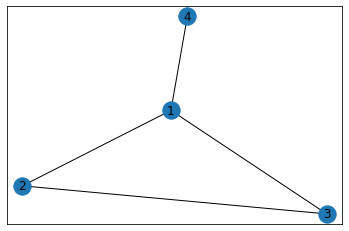

In [14]:
nx.draw_networkx(g)
plt.savefig("test.png")

Very exciting :-).

There are many things to do with the graph once we have created it, some of which we will explore here with a word semantic network.

First let's load some data: the Grimmer Senate press release corpus:    
非常令人興奮:-)。

我們創建了許多圖表有許多事情，其中一些我們將使用單詞語義網絡探索。

首先讓我們加載一些數據：Grimmer參議院新聞稿語料庫：

In [15]:
senReleasesDF = pandas.read_csv('../data/senReleasesTraining.csv', index_col = 0)
senReleasesDF[:3]

download_url  \
0  https://raw.githubusercontent.com/lintool/Grim...   
1  https://raw.githubusercontent.com/lintool/Grim...   
2  https://raw.githubusercontent.com/lintool/Grim...   

                                            html_url                    name  \
0  https://github.com/lintool/GrimmerSenatePressR...  01Apr2005Kennedy14.txt   
1  https://github.com/lintool/GrimmerSenatePressR...  01Aug2005Kennedy12.txt   
2  https://github.com/lintool/GrimmerSenatePressR...  01Aug2006Kennedy10.txt   

                                 path  \
0  raw/Kennedy/01Apr2005Kennedy14.txt   
1  raw/Kennedy/01Aug2005Kennedy12.txt   
2  raw/Kennedy/01Aug2006Kennedy10.txt   

                                                text targetSenator  
0           FOR IMMEDIATE RELEASE   FOR IMMEDIATE...       Kennedy  
1           FOR IMMEDIATE RELEASE   FOR IMMEDIATE...       Kennedy  
2           FOR IMMEDIATE RELEASE  FOR IMMEDIATE ...       Kennedy

We will be extracting sentences, as well as tokenizing and stemming. (You should be able to do this in your sleep now).  
我們將提取句子，以及令牌化和莖。 （你現在應該能夠在睡眠中做到這一點）。

anaconda3\lib\site-packages\lucem_illud_2020\proccessing.py in <listcomp>(.0)  
     89 def sent_tokenize(word_list, model=nlp):  
     90     doc = model(word_list)  
---> 91     sentences = [sent.string.strip() for sent in doc.sents]  
     92     return sentences  
     93   
  
AttributeError: 'spacy.tokens.span.Span' object has no attribute 'string'  
    
# 修改 "string" to "text"

In [16]:
#這執行會很久
senReleasesDF['tokenized_sents'] = senReleasesDF['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

Let's begin by looking at words that co-occur in the sentences:  
讓我們首先查看句子中共同發生的詞語：

In a nutshell, x |= y is shorthand for x = x | y，聯集  
Python set 物件是無序的集合(unordered collection)，set 集合很重要的精隨是 set 集合不會包含重複的資料

[Python enumerate() 函数](https://www.runoob.com/python/python-func-enumerate.html)  
產生序號並疊代


In [157]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    #print(sentences)
    #print("\n============\n============\n============\n============\n")
    for sent in sentences:
        #print(sent)
        words |= set(sent)
        #print(words)
        #print("---")
    #print(words)
    #print("\n============\n============\n============\n============\n")
    #print(set(sent))  
    #print("\n============\n============\n============\n============\n")
    #print(words)
    #print("---")
    wordLst = list(words)
    #print(wordLst)
    #print("---")
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    print(wordIndices)
    #print("---")
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [158]:
#WC = wordCooccurrence(senReleasesDF['normalized_sents'][:1].sum(),True)
WC = wordCooccurrence(senReleasesDF['normalized_sents'][:1].sum())

{'companies': 0, 'england': 1, 'work': 2, 'america': 3, 'business': 4, 'department': 5, 'program': 6, 'polytechnic': 7, 'past': 8, 'laura': 9, 'study': 10, 'capps': 11, 'institute': 12, 'commitment': 13, 'global': 14, 'new': 15, 'grant': 16, 'release': 17, 'm': 18, 'boston': 19, 'closer': 20, 'critical': 21, 'focusing': 22, 'nations': 23, 'international': 24, 'education': 25, 'immediate': 26, 'council': 27, 'understanding': 28, 'faculty': 29, 'african': 30, 'wagoner': 31, 'country': 32, 'africa': 33, 'challenges': 34, 'corporate': 35, 's': 36, 'experience': 37, 'senator': 38, 'improve': 39, 'economy': 40, 'strengthen': 41, 'involvement': 42, 'principle': 43, 'develop': 44, 'students': 45, 'wpi': 46, 'community': 47, 'said': 48, 'federal': 49, 'contact': 50, 'edward': 51, 'worcester': 52, 'increasing': 53, 'funds': 54, 'years': 55, 'commend': 56, 'ma': 57, 'today': 58, 'announced': 59, 'ties': 60, 'use': 61, 'enable': 62, 'globalization': 63, 'facing': 64, 'knowledge': 65, 'melissa': 66

In [149]:
WC 

In [150]:
g = wordCooccurrence(senReleasesDF['normalized_sents'][:1].sum())

I'm going to explain the function defined above line by line. But before we look at the function, let's first look at the structure of the data that we use here, senReleasesDF['normalized_sents'].   
  
我將通過行通過行解釋上面定義的函數。但在我們看看這個功能之前，讓我們首先看看我們在這裡使用的數據的結構，SenreleaseDF ['ranalized_sents']。

In [151]:
senReleasesDF['normalized_sents']

0      [[immediate, release, immediate, release, cont...
1      [[immediate, release, immediate, release, cont...
2      [[immediate, release, immediate, release, wash...
3      [[immediate, release, immediate, release, wash...
4      [[immediate, release, immediate, release, cont...
                             ...                        
995    [[immediate, release, department, housing, urb...
996    [[immediate, release, welcome, today, s, ira, ...
997    [[immediate, release, immediate, release, wash...
998    [[immediate, release, immediate, release, wash...
999    [[immediate, release, immediate, release, come...
Name: normalized_sents, Length: 999, dtype: object

As you can see, senReleasesDF['normalized_sents'] is a pandas series, i.e., one-dimensional labeled array that contains any type of data. Each array is comprised of a list of lists. In particular, each array is a list of sentences, each of which is also a list of words.   
  
如您所見，SenreleaseDF ['normalized_sents']是一個熊貓系列，即包含任何類型數據的一維標記數組。每個陣列都由列表組成。特別地，每個陣列是句子列表，每個句子也是單詞列表。

In [152]:
senReleasesDF['normalized_sents'][0] #each array is a list of sentences

[['immediate', 'release', 'immediate', 'release', 'contact'],
 ['melissa',
  'wagoner',
  'brent',
  'carney',
  'boston',
  'ma',
  'senator',
  'edward',
  'm'],
 ['kennedy',
  'announced',
  'today',
  'worcester',
  'polytechnic',
  'institute',
  'receive',
  'grant',
  'business',
  'international',
  'education',
  'program',
  'u',
  's'],
 ['department',
  'education',
  'wpi',
  'use',
  'funds',
  'project',
  'south',
  'africa',
  'improve',
  'understanding',
  'south',
  'africa',
  'economy',
  'enable',
  'wpi',
  'students',
  'study',
  'south',
  'africa',
  'strengthen',
  'new',
  'england',
  'companies',
  'involvement',
  'south',
  'africa',
  'wpi',
  'received',
  'federal',
  'funds',
  'past',
  'years',
  'business',
  'international',
  'education',
  'program',
  'project',
  'focusing',
  'namibia',
  'senator',
  'kennedy',
  'said'],
 ['principle',
  'challenges',
  'facing',
  'country',
  'economy',
  'today',
  'globalization'],
 ['grant',
  'enab

In [23]:
senReleasesDF['normalized_sents'][0][4] #each sentence is a list of words

['principle',
 'challenges',
 'facing',
 'country',
 'economy',
 'today',
 'globalization']

So, what do we want to do with this data? First, we want a list of words that occurred at least once in this corpus. Then, second, we want a word-word co-occurrence matrix. This is a square matrix (i.e. matrix with the name number of rows and columns), the rows and columns of which are words, and the entries of which refer to how many times these two words appeared together in sentences.  
  
那麼，我們想用這個數據做什麼？首先，我們希望在此語料庫中至少發生一次的單詞列表。  
然後，第二，我們想要一個單詞詞共生矩陣。  
這是一個方形矩陣（即，具有名稱和列的名稱的矩陣），其中的行和列是單詞，其中條目是指這兩個單詞在句子中一起出現的次數。

Let's start with the first task: getting a complete list of words in the corpus. 

(1) a complete list of unique words that appeared in this corpus

Since the data is a nested list (words are elements of sentences (which are lists) that are elements of lists (documents), we need to get each sentence out of each document and then get each word out of each sentence. So we do "for sent in sentences" to get each sentence out of each document, one by one, to extract word(s) that appeared in each sentence. But, in some sentences, same word appears more than once. So we use set() function, which converts a list (which, here, is each sentence) into a set. What is a set? It's the same old set that we know in mathematics: an unordered collection of items. Each element in a set is unique. Thus, using set(), we can get unique elements (that are, here, words) of each sentence. 

What is the "|=" here? This works as union operation when used with sets (just like +=). Then, we use list() to convert this set of words into a list. 

Then we assign index to each word. You'll see why we do it in the next step--to make the word-word co-occurrence matrix. So we do "wordIndices = {w: i for i, w in enumerate(wordLst)}", which will give us a dictionary whose keys are words and values are indices that we assigned to each word.  
  
讓我們從第一個任務開始：在語料庫中獲取完整的單詞列表。

（1）完整列表此語料庫中的唯一單詞

由於數據是嵌套列表（單詞是作為列表（文檔）元素的句子的元素（這是列表），我們需要將每個句子從每個文檔中獲取，然後從每個句子中獲取每個單詞。所以我們這樣做“對於以句子發送”來將每個文檔中的每個句子逐個獲取，以提取出現在每個句子中的單詞。  
但是，在某些句子中，同一詞似乎多次出現。所以我們使用set（）轉換列表的函數（這裡，每個句子是每個句子）到一個集合中。什麼是一組？  
它是我們在數學中知道的與眾不同的舊集合：一個無序的項目集合。  
集合中的每個元素都是唯一的。 ，使用set（），我們可以獲得每個句子的唯一元素（即在這裡，單詞）。

這裡的“| =”是什麼？與集合一起使用（就像+ =）時，這適用於工會操作。然後，我們使用list（）將此組單詞轉換為列表。

然後我們為每個單詞分配索引。你會看到我們為什麼在下一步中做到 - 製作詞詞共同發生矩陣。所以我們這樣做“WordIndices = {W：i for i，w in枚舉（wordlst）}”，它會給我們一個鍵是單詞的字典，並且值是我們分配給每個字的指數。

(2) word co-occurrence matrix  
（2）單詞共同發生矩陣

Now we have the complete list of words that appeared at least once in the corpus (with index assigned to each word). Using this, we want to make word-word co-occurrence matrix.

We first make an empty matrix, the size of which is n x n, where n refers to the number of unique words in the corpus. coOcMat is the empty matrix that we made by "coOcMat = np.zeros((len(wordIndices), len(wordIndices)))"

Then we'll count how many times each pair of words co-occurred in the corpus. So, we do another loop. Each sentence ("sent") has word(s). We want to select each word in a sentence, and find which words co-occurred with this word in each sentence, and then we move on to the next word in a sentence, do the same thing, until we get to the last word in this list (which is, here, a sentence); and, we iterate the whole process for every sentence. 

How did we do it? Let's look at the second loop. By doing "for i, word1 in enumerate(sent):", we select each word in each sentence ("sent"). Then we get the index of this word that we assigned above in the word list (here, be careful, we have two indices here, one refers to the index that we assigned in "wordIndices", and the other to the temporary index in each sentence that we got from "enumerate(sent)"--here, the "index" refers to the former, the one we can find in the wordIndices), by doing: "word1Index = wordIndices[word1]". Then, we count how many times the words next to this word in this list ("sent[i +1:]") co-occurred with this word, and update it to the coOcMat matrix.  
  
現在我們有完整的單詞列表，其中至少在語料庫中出現一次（具有分配給每個單詞的索引）。使用此，我們想要製作字詞共同發生矩陣。

我們首先製作一個空矩陣，其大小是n x n，其中n是指語料庫中的唯一單詞的數量。 Coocmat是我們由"coOcMat = np.zeros((len(wordIndices), len(wordIndices)))"製作的空矩陣

然後，我們將計算每對單詞在語料庫中發生的單詞。所以，我們做另一個循環。每個句子（“sent”）有字。我們希望在句子中選擇每個單詞，並在每個句子中找到哪個單詞與此單詞一起發生，然後我們繼續在句子中的下一個單詞，做同樣的事情，直到我們進入最後一個單詞這個列表（這裡是，句子）;而且，我們為每個句子迭代整個過程。

我們是怎麼做的？讓我們看看第二個循環。通過“for i, word1 in enumerate(sent):”，我們在每個句子中選擇sentence ("sent")。然後我們獲得了這個詞的索引，我們在Word列表中分配了上面的（這裡，小心，我們在這裡有兩個指數，指我們分配在“Wordindices”中的索引，另一個指索引從“枚舉（發送）”中獲取的句子 - 在這裡，“index”是指前者，我們在歌曲indices中找到的那個），通過執行以下操作：“Word1Index = WordIndices [Word1]”。然後，我們計算此列表中此單詞旁邊的單詞的單詞（"sent[i +1:]"）與此單詞一起發生，並將其更新為Coocmat矩陣。

By the way, why do we do "coOcMat = coOcMat.T + coOcMat"?

If you go back and see what the loop does, and think about the characteristics of word-word co-occurrence matrix, it would make sense. Think about the structural characteristics of word-word co-occurrence matrix: it is a square matrix; it's a symmetric matrix (i.e. a square matrix that is equal to its transpose); and, it's main diagonal is zero. That said, in this matrix, let's say A, Aij and Aji are identical. This makes sense since the co-occurrence of i and j and the same as the co-occurrence of j and i. 

Let's go back to the loop we did above, especially how we counted the co-occurrence of each pair of words. We got the index of a word, let's say i, with another words, let's say j, and then we added 1 to Aij, rather than Aji. So, to make this matrix, coOcMat, a word-word co-occurrence matrix, we should add coOcMat and the transpose of this matrix (coOcMat.T).  
  
順便說一句，為什麼我們做“coocmat = coocmat.t + coocmat”？

如果您返回並查看循環的內容，並考慮字詞共同發生矩陣的特徵，它會有意義。  
思考單詞共同發生矩陣的結構特徵：它是一個方形矩陣;它是一個對稱矩陣（即，等於其轉置的方矩陣）;  
而且，它的主要對角線為零。也就是說，在這個矩陣中，讓我們說A，AIJ和AJI是相同的。由於I和J的共同發生和J和I的共同發生，這是有道理的。  

讓我們回到我們上面的循環，特別是我們如何計算每對單詞的共同發生。我們得到了一個單詞的索引，讓我們說我，用另一個詞，讓我們說j，然後我們添加了1到aij，而不是aji。因此，為了使這個矩陣，Coocmat，一個單詞詞共發生矩陣，我們應該添加Coocmat和這個矩陣的轉置（Coocmat.t）。

First, build a graph based on word cooccurences in the first 100 press releases.  
首先，在前100名新聞稿中構建基於Word Cooccurises的圖形。

In [24]:
g = wordCooccurrence(senReleasesDF['normalized_sents'][:100].sum())

In [25]:
senReleasesDF['normalized_sents'][:10]

0    [[immediate, release, immediate, release, cont...
1    [[immediate, release, immediate, release, cont...
2    [[immediate, release, immediate, release, wash...
3    [[immediate, release, immediate, release, wash...
4    [[immediate, release, immediate, release, cont...
5    [[immediate, release, immediate, release, wash...
6    [[immediate, release, immediate, release, mr, ...
7    [[immediate, release, washington, dc, today], ...
8    [[immediate, release, rachel, racusen, miller,...
9    [[immediate, release, washington, dc, today], ...
Name: normalized_sents, dtype: object

In [26]:
senReleasesDF['normalized_sents'][:10].sum()

[['immediate', 'release', 'immediate', 'release', 'contact'],
 ['melissa',
  'wagoner',
  'brent',
  'carney',
  'boston',
  'ma',
  'senator',
  'edward',
  'm'],
 ['kennedy',
  'announced',
  'today',
  'worcester',
  'polytechnic',
  'institute',
  'receive',
  'grant',
  'business',
  'international',
  'education',
  'program',
  'u',
  's'],
 ['department',
  'education',
  'wpi',
  'use',
  'funds',
  'project',
  'south',
  'africa',
  'improve',
  'understanding',
  'south',
  'africa',
  'economy',
  'enable',
  'wpi',
  'students',
  'study',
  'south',
  'africa',
  'strengthen',
  'new',
  'england',
  'companies',
  'involvement',
  'south',
  'africa',
  'wpi',
  'received',
  'federal',
  'funds',
  'past',
  'years',
  'business',
  'international',
  'education',
  'program',
  'project',
  'focusing',
  'namibia',
  'senator',
  'kennedy',
  'said'],
 ['principle',
  'challenges',
  'facing',
  'country',
  'economy',
  'today',
  'globalization'],
 ['grant',
  'enab

Why do we do .sum() here? This is because senReleasesDF['normalized_sents'] is, as I mentioned above, a pandas series, and the wordCooccurrence function that we defined above takesa list rather than pandas series. So, by doing senReleasesDF['normalized_sents'].sum(), we combine all the arrays into a list (of course, of lists).  
  
為什麼我們在這裡做.sum（）？  
這是因為SenreleaseDF ['randalized_sents']是我上面提到的熊貓系列，以及我們定義的Warta列表而不是Pandas系列的字母函數。  
所以，通過執行senreleasesdf ['normalized_sents']。sum（），我們將所有數組組合成列表（當然是列表）

Total number of vertices:

In [27]:
len(g.nodes)

6439

Total number of edges:

In [28]:
len(g.edges)

262152

A part of the adjacency matrix of cleaned word by press releases:  
按新版本清潔單詞的鄰接矩陣的一部分：

In [29]:
nx.to_numpy_matrix(g)[:10, :10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
nx.to_numpy_matrix(g)[:10, :5]

matrix([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [160]:
aaa = nx.to_numpy_matrix(g)
#aaa.size
aaa.ndim
#aaa.shape

2

We can save the graph and read it later, although this is slow if there are many edges or nodes, so we will filter first, as we will demonstrate below.  
  
我們可以保存圖形並稍後閱讀，但如果有許多邊或節點，則這緩慢，因此我們將首先過濾，因為我們將在下面演示。

In [32]:
#nx.write_graphml(g, '../data/Obama_words.graphml')

Alternatively, we can build graphs starting with a two-mode network. Let's use the document-word frequency matrix.  
或者，我們可以構建以雙模式網絡開頭的圖形。讓我們使用文檔字頻率矩陣。

In [33]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized

In [34]:
import sklearn.feature_extraction
# in case we get a module not found error

[sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
CountVectorizer會計算單字出現在文件的次數；再透過TfidfVectorizer轉換成TFIDF和IDF。也可以直接使用TfidfTransformer計算TFIDF。
  
將文本文檔的集合轉換為令牌計數的矩陣。  
此實現使用scipy.sparse.csr_matrix生成計數的稀疏表示。  
如果您不提供A-priori字典，並且您不使用某種特徵選擇的分析器，則功能的數量將等於通過分析數據找到的詞彙量  
  
在tokennizer步驟使用自己定義的函式
Override the string tokenization step while preserving the preprocessing and n-grams generation step
  
fit_transform(raw_documents[, y])
Learn the vocabulary dictionary and return document-term matrix.  
學習詞彙字典並返回文檔術語矩陣。

In [35]:
senVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
senVects_incidence = senVectorizer.fit_transform(senReleasesDF['text'][:100])

In [36]:
senVects_incidence.shape

(100, 6439)

We need to turn the incidence matrix into a network.   
Note the use of bipartite as an attribute--this is how you need to tell networkx the graph is bipartite:  
  
我們需要將矩陣轉換為網絡。  
注意使用雙方作為屬性 - 這是您需要告訴NetworkX的圖形是Bipartite的方式：

底下會用到的函式
[etworkx.Graph.add_nodes_from](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_nodes_from.html?highlight=add_nodes_from)  
Parameters  
nodes_for_add  
iterable container
A container of nodes (list, dict, set, etc.). OR A container of (node, attribute dict) tuples. Node attributes are updated using the attribute dict.

attr  
keyword arguments, optional (default= no attributes)
Update attributes for all nodes in nodes. Node attributes specified in nodes as a tuple take precedence over attributes specified via keyword arguments.  
[networkx.Graph.add_edges_from](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edges_from.html?highlight=add_edges_from)  


In [37]:
#senVects_incidence.nonzero()

In [38]:
#print(senVects_incidence)
#type(senVects_incidence)
#senVects_incidence.data

In [39]:
#for d, w in zip(*senVects_incidence.nonzero()):
    #print(d, w)
    #print(senVects_incidence[d, w])

In [40]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((senVectorizer.get_feature_names()[i] for i in range(senVects_incidence.shape[1])), bipartite = 'word') # Add the node attribute "word"
g_2mode.add_nodes_from(range(senVects_incidence.shape[0]), bipartite = 'doc') # Add the node attribute "doc"

#add all the edges
g_2mode.add_edges_from(((d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence[d, w]}) for d, w in zip(*senVects_incidence.nonzero())))

get_feature_names()
DEPRECATED: get_feature_names is deprecated in 1.0 and will be removed in 1.2.  
已棄用：get_feature_names在1.0中棄用，將在1.2中刪除。

(
(d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence[d, w]}) 
for d, w in zip(*senVects_incidence.nonzero())
)  
A：
B：

[Python 函式 zip() 教學：同時迭代多個 list，學習刷題與資料分析技巧](https://haosquare.com/python-zip-function/)
矩陣轉置：用 Python 解 LeetCode 演算法題目常用技巧
dict 反轉：NLP 資料分析建立詞庫
同時迭代多個長短不一的 list：zip() 的進階用法  
  
用 ＊ 符號解包
呼叫函式的時候，如果在可迭代物件的引數前面加上 * 符號，可以進行解包（unpack）：將可迭代物件內的每個內容物各自成為引數。  
  
[http://puremonkey2010.blogspot.com/2015/10/python-python-zip.html](http://puremonkey2010.blogspot.com/2015/10/python-python-zip.html)  
zip() 是 Python 的一個內建函數，它接受一系列可迭代的對象作為參數，將對象中對應的元素打包成一個個 tuple（元組），然後返回由這些 tuples 組成的 list（列表）。若傳入參數的長度不等，則返回list的長度和參數中長度最短的對象相同。利用*號操作符，可以將 list unzip（解壓）。  
  
[Python 中星號的本質及其使用方式](https://www.gushiciku.cn/pl/2AHr/zh-tw)
使用*在元組拆包封期間時捕獲各項  
使用*將疊代器解解包到列表/元組中  
  

In [41]:
print(nx.info(g_2mode))

Name: 
Type: Graph
Number of nodes: 6539
Number of edges: 23406
Average degree:   7.1589


A very popular layout algorithm for visualizing graphs is the Fruchterman-Reingold Algorithm (or spring layout), which uses a physical metaphor for lay-out. Nodes repel one another, and edges draw connected elements together like springs. The algorithm attempts to minimize the energy in such a system. For a large graph, however, the algorithm is computational demanding.   
  
用於可視化圖形的非常受歡迎的佈局算法是Fruchterman-Reingold算法（或Spring Layout），它使用物理隱喻進行佈局。  
節點彼此排斥，並且邊緣像彈簧一樣繪製連接的元件。  
該算法嘗試最小化這種系統中的能量。然而，對於大圖，該算法是計算苛刻的。

Let's plot the bipartite network with a quick spring layout:  
  
讓我們用一個快速的彈簧佈局繪製二分網絡：

--
[FR算法(Fruchterman-Reingold)](https://www.cnblogs.com/Dyleaf/p/8491136.html)  


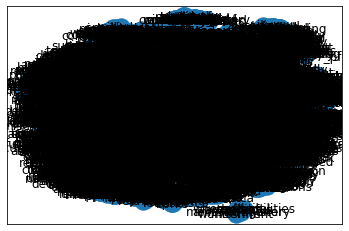

In [42]:
#這會跑很久
nx.draw_networkx(g_2mode)

With no filtering, this will not bring insight (see below). If we want even faster computation and tunable visualizations, check out [Pajek](http://mrvar.fdv.uni-lj.si/pajek/) or [gephi](https://gephi.org/).

沒有過濾，這不會帶來洞察力（見下文）。如果我們想要更快的計算和可調可視化，請參考 [Pajek](http://mrvar.fdv.uni-lj.si/pajek/) or [gephi](https://gephi.org/).

A two-mode network can be easily transformed into two one-mode network, enabling words to be connected to other words via the number of documents that share them, or documents to be connected to other documents via the words they share:  
  
兩個模式網絡可以很容易地轉換為兩個單模網絡，通過共享它們的文檔的數量，可以通過分享它們的文檔的數量來連接到其他單詞的單詞，或者通過它們共享的單詞連接到其他文檔的文檔：

In [43]:
g_2mode.nodes(data = True)

NodeDataView({'0853christina': {'bipartite': 'word'}, '1960s': {'bipartite': 'word'}, '1970s': {'bipartite': 'word'}, '1980s': {'bipartite': 'word'}, '1990s': {'bipartite': 'word'}, '1st': {'bipartite': 'word'}, '2005access': {'bipartite': 'word'}, '2005mr': {'bipartite': 'word'}, '2006the': {'bipartite': 'word'}, '20070801gaoffelp': {'bipartite': 'word'}, '2007boston': {'bipartite': 'word'}, '2010the': {'bipartite': 'word'}, '21st': {'bipartite': 'word'}, '22nd': {'bipartite': 'word'}, '234c': {'bipartite': 'word'}, '2633sandra': {'bipartite': 'word'}, '401ks': {'bipartite': 'word'}, '5643alec': {'bipartite': 'word'}, '5a': {'bipartite': 'word'}, '5b': {'bipartite': 'word'}, '7115today': {'bipartite': 'word'}, '90s': {'bipartite': 'word'}, 'a07f0017': {'bipartite': 'word'}, 'aba': {'bipartite': 'word'}, 'abandon': {'bipartite': 'word'}, 'abandoned': {'bipartite': 'word'}, 'abandoning': {'bipartite': 'word'}, 'abby': {'bipartite': 'word'}, 'abdicating': {'bipartite': 'word'}, 'abide': 

In [44]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    print(g_mono)  
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [45]:
gDoc = contractNetwork(g_2mode, 'doc')

Let's first take a look at the document-to-document network:  
讓我們先看看文檔到文檔網絡：

In [46]:
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 4950
Average degree:  99.0000


Let's construct a visualization. It is not surprising that almost every document is connected to every other. We can use edge weight to distinguish document distance (modeled as attraction):  
  
讓我們構建可視化。幾乎每個文檔都與其他一份文件相連並不奇怪。我們可以使用邊緣重量來區分文檔距離（建模為吸引力）：

spring_layout用來設定佈局  
[networkx.drawing.layout.spring_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html)
參數：  
gDoc：A position will be assigned to every node in G，將分配給G中每個節點的位置  
k：  Optimal distance between nodes. If None the distance is set to 1/sqrt(n) where n is the number of nodes. Increase this value to move nodes farther apart，節點之間的最佳距離。如果距離設置為1 / sqrt（n），其中n是節點的數量。增加此值以移動節點進一步
weight：The edge attribute that holds the numerical value used for the edge weight. Larger means a stronger attractive force. If None, then all edge weights are 1.保持邊緣重量的數字值的邊緣屬性。較大的意味著更強烈的吸引力。如果沒有，那麼所有邊緣權重都為1。  
iterations：Maximum number of iterations taken，採取的最大迭代次數

In [47]:
gDoc.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [48]:
gDoc.nodes(data=True)

NodeDataView({0: {'bipartite': 'doc'}, 1: {'bipartite': 'doc'}, 2: {'bipartite': 'doc'}, 3: {'bipartite': 'doc'}, 4: {'bipartite': 'doc'}, 5: {'bipartite': 'doc'}, 6: {'bipartite': 'doc'}, 7: {'bipartite': 'doc'}, 8: {'bipartite': 'doc'}, 9: {'bipartite': 'doc'}, 10: {'bipartite': 'doc'}, 11: {'bipartite': 'doc'}, 12: {'bipartite': 'doc'}, 13: {'bipartite': 'doc'}, 14: {'bipartite': 'doc'}, 15: {'bipartite': 'doc'}, 16: {'bipartite': 'doc'}, 17: {'bipartite': 'doc'}, 18: {'bipartite': 'doc'}, 19: {'bipartite': 'doc'}, 20: {'bipartite': 'doc'}, 21: {'bipartite': 'doc'}, 22: {'bipartite': 'doc'}, 23: {'bipartite': 'doc'}, 24: {'bipartite': 'doc'}, 25: {'bipartite': 'doc'}, 26: {'bipartite': 'doc'}, 27: {'bipartite': 'doc'}, 28: {'bipartite': 'doc'}, 29: {'bipartite': 'doc'}, 30: {'bipartite': 'doc'}, 31: {'bipartite': 'doc'}, 32: {'bipartite': 'doc'}, 33: {'bipartite': 'doc'}, 34: {'bipartite': 'doc'}, 35: {'bipartite': 'doc'}, 36: {'bipartite': 'doc'}, 37: {'bipartite': 'doc'}, 38: {'bi

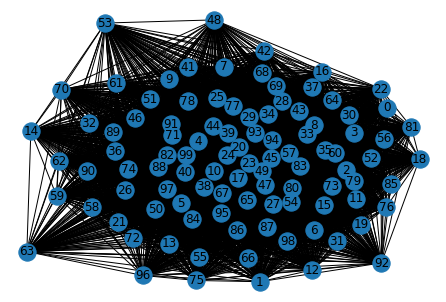

In [49]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}) #Getting labels is a bit annoying

Lets draw the graph with high and low weight edges distinguished:

In [50]:
for node1, node2, d in gDoc.edges(data = True):
    print(node1)
    print("---")
    print(node2)
    print("---")
    print(d)
    print("---")
    print(d['weight'])
    print("=================")

0
---
40
---
{'weight': 29}
---
29
0
---
50
---
{'weight': 19}
---
19
0
---
91
---
{'weight': 22}
---
22
0
---
99
---
{'weight': 22}
---
22
0
---
13
---
{'weight': 17}
---
17
0
---
20
---
{'weight': 35}
---
35
0
---
23
---
{'weight': 26}
---
26
0
---
24
---
{'weight': 35}
---
35
0
---
82
---
{'weight': 23}
---
23
0
---
95
---
{'weight': 16}
---
16
0
---
97
---
{'weight': 16}
---
16
0
---
4
---
{'weight': 26}
---
26
0
---
10
---
{'weight': 30}
---
30
0
---
11
---
{'weight': 14}
---
14
0
---
17
---
{'weight': 25}
---
25
0
---
39
---
{'weight': 43}
---
43
0
---
43
---
{'weight': 13}
---
13
0
---
45
---
{'weight': 27}
---
27
0
---
49
---
{'weight': 28}
---
28
0
---
54
---
{'weight': 33}
---
33
0
---
57
---
{'weight': 30}
---
30
0
---
59
---
{'weight': 8}
---
8
0
---
60
---
{'weight': 19}
---
19
0
---
61
---
{'weight': 11}
---
11
0
---
62
---
{'weight': 11}
---
11
0
---
65
---
{'weight': 24}
---
24
0
---
68
---
{'weight': 12}
---
12
0
---
71
---
{'weight': 18}
---
18
0
---
78
---
{'weight':

3
---
8
---
{'weight': 35}
---
35
3
---
10
---
{'weight': 43}
---
43
3
---
17
---
{'weight': 77}
---
77
3
---
46
---
{'weight': 26}
---
26
3
---
50
---
{'weight': 25}
---
25
3
---
79
---
{'weight': 24}
---
24
3
---
80
---
{'weight': 41}
---
41
3
---
86
---
{'weight': 29}
---
29
3
---
89
---
{'weight': 13}
---
13
3
---
90
---
{'weight': 17}
---
17
3
---
95
---
{'weight': 39}
---
39
3
---
97
---
{'weight': 39}
---
39
3
---
6
---
{'weight': 28}
---
28
3
---
14
---
{'weight': 11}
---
11
3
---
18
---
{'weight': 12}
---
12
3
---
20
---
{'weight': 53}
---
53
3
---
22
---
{'weight': 12}
---
12
3
---
23
---
{'weight': 61}
---
61
3
---
24
---
{'weight': 53}
---
53
3
---
25
---
{'weight': 29}
---
29
3
---
28
---
{'weight': 40}
---
40
3
---
32
---
{'weight': 16}
---
16
3
---
34
---
{'weight': 40}
---
40
3
---
43
---
{'weight': 25}
---
25
3
---
44
---
{'weight': 45}
---
45
3
---
45
---
{'weight': 66}
---
66
3
---
48
---
{'weight': 13}
---
13
3
---
49
---
{'weight': 52}
---
52
3
---
51
---
{'weight'

---
30
6
---
17
---
{'weight': 73}
---
73
6
---
20
---
{'weight': 42}
---
42
6
---
23
---
{'weight': 50}
---
50
6
---
24
---
{'weight': 42}
---
42
6
---
38
---
{'weight': 32}
---
32
6
---
39
---
{'weight': 37}
---
37
6
---
52
---
{'weight': 19}
---
19
6
---
57
---
{'weight': 33}
---
33
6
---
80
---
{'weight': 23}
---
23
6
---
87
---
{'weight': 18}
---
18
6
---
93
---
{'weight': 40}
---
40
6
---
94
---
{'weight': 41}
---
41
6
---
14
---
{'weight': 9}
---
9
6
---
18
---
{'weight': 11}
---
11
6
---
22
---
{'weight': 11}
---
11
6
---
25
---
{'weight': 25}
---
25
6
---
28
---
{'weight': 27}
---
27
6
---
32
---
{'weight': 12}
---
12
6
---
34
---
{'weight': 27}
---
27
6
---
43
---
{'weight': 19}
---
19
6
---
44
---
{'weight': 36}
---
36
6
---
45
---
{'weight': 54}
---
54
6
---
48
---
{'weight': 8}
---
8
6
---
49
---
{'weight': 34}
---
34
6
---
50
---
{'weight': 17}
---
17
6
---
51
---
{'weight': 15}
---
15
6
---
56
---
{'weight': 15}
---
15
6
---
60
---
{'weight': 23}
---
23
6
---
61
---
{'we

---
33
9
---
30
---
{'weight': 33}
---
33
9
---
33
---
{'weight': 34}
---
34
9
---
35
---
{'weight': 18}
---
18
9
---
36
---
{'weight': 18}
---
18
9
---
38
---
{'weight': 26}
---
26
9
---
40
---
{'weight': 16}
---
16
9
---
57
---
{'weight': 29}
---
29
9
---
62
---
{'weight': 10}
---
10
9
---
65
---
{'weight': 20}
---
20
9
---
71
---
{'weight': 31}
---
31
9
---
77
---
{'weight': 41}
---
41
9
---
82
---
{'weight': 22}
---
22
9
---
84
---
{'weight': 14}
---
14
9
---
89
---
{'weight': 9}
---
9
9
---
91
---
{'weight': 23}
---
23
9
---
99
---
{'weight': 23}
---
23
9
---
11
---
{'weight': 15}
---
15
9
---
18
---
{'weight': 16}
---
16
9
---
19
---
{'weight': 14}
---
14
9
---
21
---
{'weight': 14}
---
14
9
---
22
---
{'weight': 16}
---
16
9
---
23
---
{'weight': 26}
---
26
9
---
37
---
{'weight': 23}
---
23
9
---
44
---
{'weight': 25}
---
25
9
---
55
---
{'weight': 21}
---
21
9
---
56
---
{'weight': 20}
---
20
9
---
59
---
{'weight': 8}
---
8
9
---
68
---
{'weight': 15}
---
15
9
---
76
---
{'we

15
12
---
95
---
{'weight': 9}
---
9
12
---
97
---
{'weight': 9}
---
9
12
---
13
---
{'weight': 8}
---
8
12
---
14
---
{'weight': 6}
---
6
12
---
16
---
{'weight': 15}
---
15
12
---
25
---
{'weight': 17}
---
17
12
---
26
---
{'weight': 15}
---
15
12
---
31
---
{'weight': 7}
---
7
12
---
32
---
{'weight': 14}
---
14
12
---
35
---
{'weight': 9}
---
9
12
---
36
---
{'weight': 12}
---
12
12
---
37
---
{'weight': 15}
---
15
12
---
41
---
{'weight': 15}
---
15
12
---
48
---
{'weight': 6}
---
6
12
---
50
---
{'weight': 14}
---
14
12
---
51
---
{'weight': 15}
---
15
12
---
53
---
{'weight': 6}
---
6
12
---
54
---
{'weight': 14}
---
14
12
---
55
---
{'weight': 16}
---
16
12
---
56
---
{'weight': 11}
---
11
12
---
58
---
{'weight': 15}
---
15
12
---
59
---
{'weight': 6}
---
6
12
---
61
---
{'weight': 8}
---
8
12
---
73
---
{'weight': 13}
---
13
12
---
74
---
{'weight': 15}
---
15
12
---
75
---
{'weight': 15}
---
15
12
---
76
---
{'weight': 10}
---
10
12
---
77
---
{'weight': 15}
---
15
12
---
80

16
---
51
---
{'weight': 18}
---
18
16
---
52
---
{'weight': 19}
---
19
16
---
53
---
{'weight': 6}
---
6
16
---
56
---
{'weight': 21}
---
21
16
---
61
---
{'weight': 11}
---
11
16
---
62
---
{'weight': 9}
---
9
16
---
73
---
{'weight': 15}
---
15
16
---
75
---
{'weight': 14}
---
14
16
---
80
---
{'weight': 22}
---
22
16
---
83
---
{'weight': 25}
---
25
16
---
90
---
{'weight': 18}
---
18
16
---
91
---
{'weight': 19}
---
19
16
---
92
---
{'weight': 10}
---
10
16
---
96
---
{'weight': 10}
---
10
16
---
99
---
{'weight': 19}
---
19
16
---
33
---
{'weight': 14}
---
14
16
---
38
---
{'weight': 17}
---
17
16
---
49
---
{'weight': 32}
---
32
16
---
69
---
{'weight': 16}
---
16
16
---
71
---
{'weight': 23}
---
23
16
---
86
---
{'weight': 11}
---
11
16
---
88
---
{'weight': 23}
---
23
16
---
65
---
{'weight': 12}
---
12
16
---
72
---
{'weight': 16}
---
16
16
---
42
---
{'weight': 9}
---
9
16
---
66
---
{'weight': 13}
---
13
16
---
70
---
{'weight': 12}
---
12
16
---
63
---
{'weight': 7}
---
7


---
{'weight': 14}
---
14
20
---
51
---
{'weight': 35}
---
35
20
---
56
---
{'weight': 72}
---
72
20
---
61
---
{'weight': 27}
---
27
20
---
63
---
{'weight': 7}
---
7
20
---
68
---
{'weight': 51}
---
51
20
---
74
---
{'weight': 54}
---
54
20
---
79
---
{'weight': 59}
---
59
20
---
85
---
{'weight': 32}
---
32
20
---
90
---
{'weight': 25}
---
25
20
---
95
---
{'weight': 63}
---
63
20
---
97
---
{'weight': 63}
---
63
20
---
78
---
{'weight': 65}
---
65
20
---
71
---
{'weight': 88}
---
88
20
---
82
---
{'weight': 94}
---
94
20
---
53
---
{'weight': 12}
---
12
20
---
21
---
{'weight': 32}
---
32
20
---
47
---
{'weight': 93}
---
93
20
---
73
---
{'weight': 46}
---
46
20
---
76
---
{'weight': 41}
---
41
20
---
81
---
{'weight': 38}
---
38
20
---
77
---
{'weight': 89}
---
89
20
---
59
---
{'weight': 22}
---
22
20
---
65
---
{'weight': 79}
---
79
20
---
98
---
{'weight': 31}
---
31
20
---
26
---
{'weight': 39}
---
39
20
---
35
---
{'weight': 64}
---
64
20
---
36
---
{'weight': 35}
---
35
20
-

51
24
---
74
---
{'weight': 54}
---
54
24
---
79
---
{'weight': 59}
---
59
24
---
85
---
{'weight': 32}
---
32
24
---
90
---
{'weight': 25}
---
25
24
---
95
---
{'weight': 63}
---
63
24
---
97
---
{'weight': 63}
---
63
24
---
78
---
{'weight': 65}
---
65
24
---
71
---
{'weight': 88}
---
88
24
---
82
---
{'weight': 94}
---
94
24
---
53
---
{'weight': 12}
---
12
24
---
47
---
{'weight': 93}
---
93
24
---
73
---
{'weight': 46}
---
46
24
---
76
---
{'weight': 41}
---
41
24
---
81
---
{'weight': 38}
---
38
24
---
77
---
{'weight': 89}
---
89
24
---
59
---
{'weight': 22}
---
22
24
---
65
---
{'weight': 79}
---
79
24
---
98
---
{'weight': 31}
---
31
24
---
26
---
{'weight': 39}
---
39
24
---
35
---
{'weight': 64}
---
64
24
---
36
---
{'weight': 35}
---
35
24
---
37
---
{'weight': 35}
---
35
24
---
55
---
{'weight': 28}
---
28
24
---
58
---
{'weight': 28}
---
28
24
---
42
---
{'weight': 32}
---
32
24
---
72
---
{'weight': 30}
---
30
24
---
41
---
{'weight': 19}
---
19
24
---
75
---
{'weight': 

53
---
{'weight': 11}
---
11
28
---
73
---
{'weight': 20}
---
20
28
---
75
---
{'weight': 12}
---
12
28
---
92
---
{'weight': 16}
---
16
28
---
96
---
{'weight': 16}
---
16
28
---
98
---
{'weight': 18}
---
18
28
---
66
---
{'weight': 15}
---
15
28
---
30
---
{'weight': 21}
---
21
28
---
42
---
{'weight': 17}
---
17
28
---
70
---
{'weight': 8}
---
8
29
---
34
---
{'weight': 131}
---
131
29
---
79
---
{'weight': 38}
---
38
29
---
40
---
{'weight': 63}
---
63
29
---
65
---
{'weight': 52}
---
52
29
---
88
---
{'weight': 56}
---
56
29
---
30
---
{'weight': 37}
---
37
29
---
33
---
{'weight': 52}
---
52
29
---
38
---
{'weight': 57}
---
57
29
---
39
---
{'weight': 92}
---
92
29
---
41
---
{'weight': 24}
---
24
29
---
45
---
{'weight': 126}
---
126
29
---
47
---
{'weight': 54}
---
54
29
---
49
---
{'weight': 97}
---
97
29
---
52
---
{'weight': 39}
---
39
29
---
54
---
{'weight': 55}
---
55
29
---
55
---
{'weight': 21}
---
21
29
---
56
---
{'weight': 37}
---
37
29
---
58
---
{'weight': 23}
---


---
39
33
---
90
---
{'weight': 15}
---
15
33
---
92
---
{'weight': 8}
---
8
33
---
93
---
{'weight': 71}
---
71
33
---
94
---
{'weight': 71}
---
71
33
---
95
---
{'weight': 41}
---
41
33
---
96
---
{'weight': 8}
---
8
33
---
97
---
{'weight': 41}
---
41
33
---
98
---
{'weight': 27}
---
27
33
---
44
---
{'weight': 79}
---
79
33
---
68
---
{'weight': 22}
---
22
33
---
71
---
{'weight': 43}
---
43
33
---
43
---
{'weight': 33}
---
33
33
---
46
---
{'weight': 25}
---
25
33
---
40
---
{'weight': 49}
---
49
33
---
57
---
{'weight': 59}
---
59
33
---
35
---
{'weight': 40}
---
40
33
---
36
---
{'weight': 17}
---
17
33
---
89
---
{'weight': 25}
---
25
33
---
91
---
{'weight': 36}
---
36
33
---
99
---
{'weight': 36}
---
36
33
---
34
---
{'weight': 30}
---
30
33
---
51
---
{'weight': 19}
---
19
33
---
72
---
{'weight': 16}
---
16
33
---
76
---
{'weight': 19}
---
19
33
---
59
---
{'weight': 9}
---
9
33
---
81
---
{'weight': 21}
---
21
33
---
78
---
{'weight': 37}
---
37
33
---
37
---
{'weight': 19

---
60
---
{'weight': 37}
---
37
38
---
62
---
{'weight': 21}
---
21
38
---
64
---
{'weight': 34}
---
34
38
---
69
---
{'weight': 38}
---
38
38
---
80
---
{'weight': 66}
---
66
38
---
41
---
{'weight': 16}
---
16
38
---
47
---
{'weight': 73}
---
73
38
---
49
---
{'weight': 91}
---
91
38
---
52
---
{'weight': 32}
---
32
38
---
55
---
{'weight': 16}
---
16
38
---
56
---
{'weight': 25}
---
25
38
---
58
---
{'weight': 15}
---
15
38
---
65
---
{'weight': 64}
---
64
38
---
73
---
{'weight': 28}
---
28
38
---
77
---
{'weight': 48}
---
48
38
---
79
---
{'weight': 45}
---
45
38
---
85
---
{'weight': 24}
---
24
38
---
87
---
{'weight': 32}
---
32
38
---
92
---
{'weight': 14}
---
14
38
---
96
---
{'weight': 14}
---
14
38
---
98
---
{'weight': 30}
---
30
38
---
57
---
{'weight': 79}
---
79
38
---
74
---
{'weight': 26}
---
26
38
---
71
---
{'weight': 56}
---
56
38
---
89
---
{'weight': 24}
---
24
38
---
51
---
{'weight': 24}
---
24
38
---
72
---
{'weight': 20}
---
20
38
---
59
---
{'weight': 12}
--

44
---
78
---
{'weight': 55}
---
55
44
---
55
---
{'weight': 17}
---
17
44
---
59
---
{'weight': 20}
---
20
44
---
53
---
{'weight': 9}
---
9
44
---
58
---
{'weight': 20}
---
20
44
---
75
---
{'weight': 14}
---
14
44
---
92
---
{'weight': 13}
---
13
44
---
96
---
{'weight': 13}
---
13
44
---
66
---
{'weight': 12}
---
12
44
---
70
---
{'weight': 9}
---
9
45
---
47
---
{'weight': 103}
---
103
45
---
49
---
{'weight': 217}
---
217
45
---
57
---
{'weight': 130}
---
130
45
---
83
---
{'weight': 118}
---
118
45
---
84
---
{'weight': 71}
---
71
45
---
88
---
{'weight': 121}
---
121
45
---
82
---
{'weight': 115}
---
115
45
---
86
---
{'weight': 71}
---
71
45
---
90
---
{'weight': 25}
---
25
45
---
95
---
{'weight': 85}
---
85
45
---
97
---
{'weight': 85}
---
85
45
---
64
---
{'weight': 63}
---
63
45
---
77
---
{'weight': 97}
---
97
45
---
79
---
{'weight': 74}
---
74
45
---
50
---
{'weight': 46}
---
46
45
---
60
---
{'weight': 78}
---
78
45
---
62
---
{'weight': 29}
---
29
45
---
67
---
{'weig

{'weight': 14}
---
14
50
---
92
---
{'weight': 9}
---
9
50
---
96
---
{'weight': 9}
---
9
50
---
98
---
{'weight': 21}
---
21
50
---
70
---
{'weight': 14}
---
14
50
---
66
---
{'weight': 15}
---
15
50
---
72
---
{'weight': 16}
---
16
51
---
82
---
{'weight': 24}
---
24
51
---
56
---
{'weight': 19}
---
19
51
---
60
---
{'weight': 19}
---
19
51
---
61
---
{'weight': 14}
---
14
51
---
62
---
{'weight': 20}
---
20
51
---
63
---
{'weight': 9}
---
9
51
---
64
---
{'weight': 19}
---
19
51
---
67
---
{'weight': 30}
---
30
51
---
68
---
{'weight': 14}
---
14
51
---
74
---
{'weight': 23}
---
23
51
---
79
---
{'weight': 12}
---
12
51
---
80
---
{'weight': 25}
---
25
51
---
85
---
{'weight': 26}
---
26
51
---
86
---
{'weight': 11}
---
11
51
---
87
---
{'weight': 25}
---
25
51
---
90
---
{'weight': 21}
---
21
51
---
95
---
{'weight': 23}
---
23
51
---
97
---
{'weight': 23}
---
23
51
---
71
---
{'weight': 32}
---
32
51
---
83
---
{'weight': 25}
---
25
51
---
84
---
{'weight': 11}
---
11
51
---
91
--

57
---
72
---
{'weight': 25}
---
25
57
---
66
---
{'weight': 21}
---
21
57
---
70
---
{'weight': 13}
---
13
57
---
64
---
{'weight': 45}
---
45
57
---
75
---
{'weight': 16}
---
16
57
---
90
---
{'weight': 23}
---
23
57
---
92
---
{'weight': 16}
---
16
57
---
96
---
{'weight': 16}
---
16
57
---
63
---
{'weight': 5}
---
5
58
---
65
---
{'weight': 11}
---
11
58
---
67
---
{'weight': 17}
---
17
58
---
73
---
{'weight': 16}
---
16
58
---
77
---
{'weight': 22}
---
22
58
---
79
---
{'weight': 13}
---
13
58
---
82
---
{'weight': 28}
---
28
58
---
83
---
{'weight': 23}
---
23
58
---
84
---
{'weight': 12}
---
12
58
---
85
---
{'weight': 19}
---
19
58
---
86
---
{'weight': 5}
---
5
58
---
87
---
{'weight': 19}
---
19
58
---
88
---
{'weight': 14}
---
14
58
---
90
---
{'weight': 17}
---
17
58
---
92
---
{'weight': 10}
---
10
58
---
93
---
{'weight': 27}
---
27
58
---
94
---
{'weight': 27}
---
27
58
---
95
---
{'weight': 17}
---
17
58
---
96
---
{'weight': 10}
---
10
58
---
97
---
{'weight': 17}
---

---
{'weight': 12}
---
12
66
---
85
---
{'weight': 31}
---
31
66
---
73
---
{'weight': 15}
---
15
66
---
83
---
{'weight': 19}
---
19
66
---
88
---
{'weight': 13}
---
13
66
---
91
---
{'weight': 20}
---
20
66
---
93
---
{'weight': 26}
---
26
66
---
94
---
{'weight': 26}
---
26
66
---
99
---
{'weight': 20}
---
20
66
---
67
---
{'weight': 16}
---
16
66
---
86
---
{'weight': 5}
---
5
66
---
95
---
{'weight': 10}
---
10
66
---
97
---
{'weight': 10}
---
10
66
---
69
---
{'weight': 16}
---
16
66
---
72
---
{'weight': 19}
---
19
66
---
75
---
{'weight': 12}
---
12
66
---
80
---
{'weight': 19}
---
19
66
---
87
---
{'weight': 16}
---
16
66
---
90
---
{'weight': 17}
---
17
66
---
77
---
{'weight': 18}
---
18
66
---
70
---
{'weight': 12}
---
12
66
---
74
---
{'weight': 16}
---
16
66
---
78
---
{'weight': 13}
---
13
66
---
81
---
{'weight': 12}
---
12
66
---
98
---
{'weight': 11}
---
11
66
---
89
---
{'weight': 6}
---
6
66
---
76
---
{'weight': 12}
---
12
66
---
79
---
{'weight': 11}
---
11
66
---

94
---
{'weight': 70}
---
70
80
---
83
---
{'weight': 54}
---
54
80
---
98
---
{'weight': 30}
---
30
80
---
85
---
{'weight': 21}
---
21
80
---
84
---
{'weight': 46}
---
46
80
---
82
---
{'weight': 47}
---
47
80
---
91
---
{'weight': 41}
---
41
80
---
99
---
{'weight': 41}
---
41
80
---
92
---
{'weight': 12}
---
12
80
---
96
---
{'weight': 12}
---
12
80
---
88
---
{'weight': 44}
---
44
80
---
81
---
{'weight': 19}
---
19
81
---
82
---
{'weight': 21}
---
21
81
---
83
---
{'weight': 31}
---
31
81
---
84
---
{'weight': 16}
---
16
81
---
93
---
{'weight': 35}
---
35
81
---
94
---
{'weight': 35}
---
35
81
---
86
---
{'weight': 11}
---
11
81
---
87
---
{'weight': 14}
---
14
81
---
88
---
{'weight': 23}
---
23
81
---
89
---
{'weight': 10}
---
10
81
---
91
---
{'weight': 17}
---
17
81
---
95
---
{'weight': 14}
---
14
81
---
97
---
{'weight': 14}
---
14
81
---
99
---
{'weight': 17}
---
17
81
---
98
---
{'weight': 18}
---
18
81
---
85
---
{'weight': 13}
---
13
81
---
90
---
{'weight': 10}
---
10

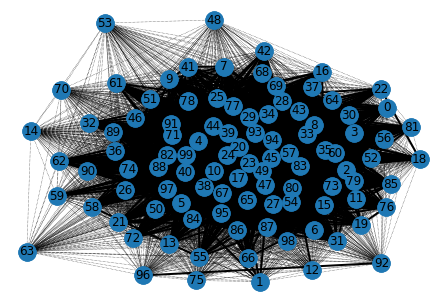

In [51]:
wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}, edgelist = edgesLow, style='dotted', width=.5)
#nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=2)

NetworkXError: Node 0 has no position.

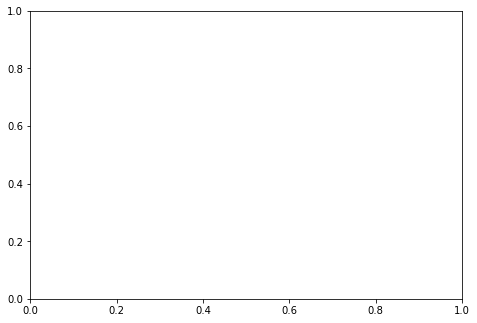

In [161]:
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=2)

Now we can see why 53 and 63 are on the outside, while 39 and 23 are at the center. We can look at them:

In [52]:
print(len(senReleasesDF.iloc[63]['text']),"words:","\n",senReleasesDF.iloc[63]['text'].strip().replace('  ', '\n'))

314 words: 
 FOR IMMEDIATE RELEASE

Senator Kennedy issued the following statement this evening following Senator Kerrys apology

John Kerry s statement says it all
I wish the Bush administration brought as much energy and focus to trying to correct their mistakes in Iraq as it did in going after John Kerry


By the way, what's "iloc" here? iloc is used to select rows and columns in Pandas DataFrame. So,  senReleasesDF.iloc[63] gives the 63th row of senReleasesDF; and since we also specified the column (['text']), it gives us the text of the 63th row.

In [53]:
print(len(senReleasesDF.iloc[23]['text']),"words:","\n",senReleasesDF.iloc[23]['text'].strip().replace('  ', '\n'))

20603 words: 
 FOR IMMEDIATE RELEASE
REID

 We re sorry that we re starting a little bit late
but the House has some votes going
and so Leader Pelosi will be here and Congresswoman Solis real soon

 I m reminded of the story I learned as a little boy
When the kid was watching the sheep and he was supposed to yell
Wolf
when the wolf was coming
And he yelled
Wolf
as we know

Wolf
Wolf
and there was never any wolf
And finally when a wolf showed up
no one came

 And no matter how hard we try to be bipartisan here in Washington
with President Bush it s the proverbial cry for wolf

 As I said leaving the chamber last night
whatever he says
it s just the opposite

 And we re here today to talk about health care
But the cry of wolf is once again ringing in my ears because he keeps talking about how he wants to improve health care and we re now five years into this and there s been no improvement

 In fact
I hope the president mentions when he s in Tennessee today that there s almost a million 

Ah...those documents with the **most** words are unsprisingly the most central in this simple document network.

Now let's turn it around and look at the word-to-word network by documents. 

In [54]:
gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))


Name: 
Type: Graph
Number of nodes: 6439
Number of edges: 3095859
Average degree: 961.5962


First, let's reduce the number of words to a manageable size.  
首先，讓我們將單詞的數量減少到可管理的大小。

numpy.mean:  
Compute the arithmetic mean along the specified axis.  
計算沿指定軸的算術平均值。

In [55]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean

1.548931330528942

We are going to return to the sentence cooccurence graph, as it suggests many more meaningful (more local) associations. But without filtering, it is too large. Let's first drop all the edges with weight below 25, then drop all the isolates. You are recommended to play with the weight here to see how the graph might look different.  
我們將返回句子協調圖，因為它表明了許多更有意義（更為局部）的關聯。  
但沒有過濾，它太大了。讓我們首先將所有重量放在25以下，然後放下所有隔離物。  
您建議使用重量來查看圖表如何看起來不同。

In [56]:
g = wordCooccurrence(senReleasesDF['normalized_sents'][:100].sum())

In [57]:
len(g)

6439

In [58]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 25])

[networkx.algorithms.isolate.isolates](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.isolate.isolates.html)  
Iterator over isolates in the graph.

In [59]:
g.remove_nodes_from(list(nx.isolates(g))) 
#since we are changing the graph list() evaluates the isolates first
#由於我們更改圖表list（）首先評估隔離物

In [60]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

先當作return看，下次呼叫會從yield進去

In [61]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
#只需保持巨型連接的組件
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 196
Number of edges: 510
Average degree:   5.2041


A bit smaller now, Now, let's visualize it: 

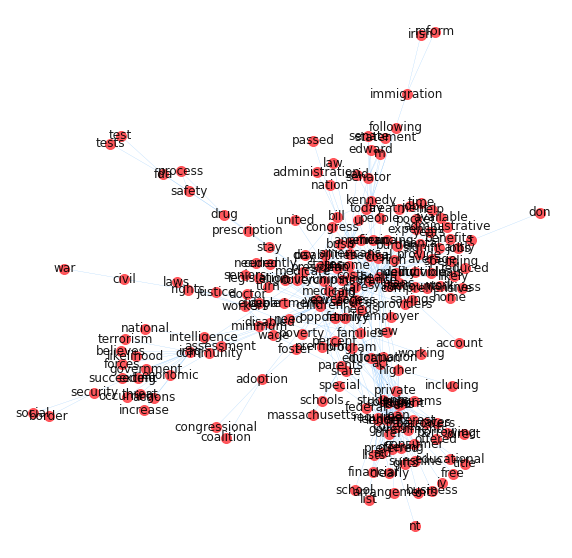

In [62]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [63]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(giant))

Let us use this oppurtunity to introduce a concept of finding communities in graphs: a popular one is the modularity measure, introduced in: Clauset, A., Newman, M. E., & Moore, C. “Finding community structure in very large networks.” Physical Review E 70(6), 2004.

networkx implements this through the above method. It yields sets of nodes, one for each community.  
  
讓我們使用這一機會介紹圖形中的社區的概念：一個流行的是模塊化措施，介紹：Clauset，A.，Newman，M. E.，＆Moore，C。“在非常大的網絡中尋找社區結構。”物理評論E 70（6），2004。

NetworkX通過上述方法實現這一點。它產生了一組節點，每個社區一個節點。

In [64]:
c

[frozenset({'access',
            'account',
            'accounts',
            'act',
            'actions',
            'administration',
            'administrative',
            'adoption',
            'aid',
            'america',
            'american',
            'americans',
            'arrangements',
            'assessment',
            'available',
            'average',
            'believes',
            'benefits',
            'bill',
            'border',
            'borrowers',
            'borrowing',
            'burden',
            'bush',
            'business',
            'care',
            'child',
            'children',
            'chip',
            'civil',
            'clearly',
            'coalition',
            'college',
            'colleges',
            'community',
            'comprehensive',
            'congress',
            'congressional',
            'consumer',
            'cost',
            'costs',
            'cover',
            

We can also remove those words that show up in many documents...those with many connections (note that this has a similar effect to selecting those with a high tf.idf score). Note that for this case we get the same graph; this is just to demonstrate the different kinds of node dropping and graph changes we can do.  
  
我們還可以刪除在許多文件中出現的那些單詞...有許多連接的單詞（請注意，這對選擇具有高TF.ID的分數具有類似的效果）。  
請注意，對於這種情況，我們得到了相同的圖表;這只是為了演示我們可以做的不同類型的節點滴滴和圖形更改。

In [65]:
giant = nx.Graph(giant)

In [66]:
giant.remove_nodes_from([n for n in giant.nodes if len(set(giant.neighbors(n))) >= 2000]) 
giant.remove_nodes_from(list(nx.isolates(giant)))
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 196
Number of edges: 510
Average degree:   5.2041


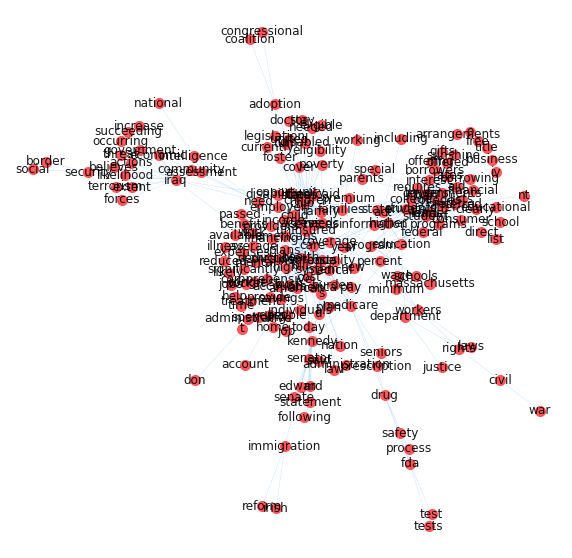

In [67]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

We can continue to trim globally to investigate the structure of words at alternative slices of network density.  
我們可以在全球範圍內繼續修剪，以研究替代方案的網絡密度的單詞結構。

Moreover, we can find cliques, or completely connected sets of nodes.  
此外，我們可以找到批變或完全連接的節點集。

In [68]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

loan, lenders, loans, private, college, students, lender, colleges


Now lets look at a subgraph of the network, those nodes that are within 1 or 2 network steps of 'america'.   
現在讓我們看一下網絡的子圖，這些節點在“america”的1或2個網絡步驟中。

In [69]:
americanNeighbors = giant.neighbors('american')
g_american = giant.subgraph(americanNeighbors)
print(nx.info(g_american))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 18
Average degree:   6.0000


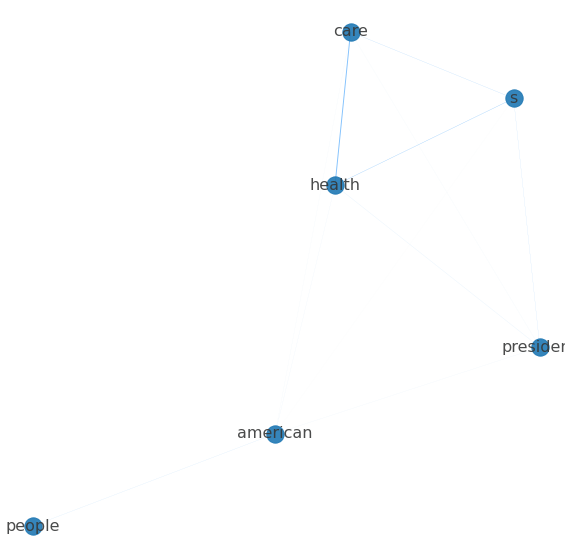

In [70]:
layout_amer = nx.spring_layout(g_american, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_american.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american.edges(data = True)))
nx.draw(g_american, ax = ax, pos = layout_amer, labels = {n:n for n in g_american.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

In [71]:
americanNeighbors = gWord.neighbors('american')
americanNeighborsPlus1 = set(americanNeighbors)
for n in americanNeighbors:
    americanNeighborsPlus1 |= set(giant.neighbors(n))
    
#for x in americanNeighborsPlus1:
#    print(x)

In [72]:
g_american2 = giant.subgraph(americanNeighborsPlus1)
print(nx.info(g_american2))

Name: 
Type: Graph
Number of nodes: 183
Number of edges: 456
Average degree:   4.9836


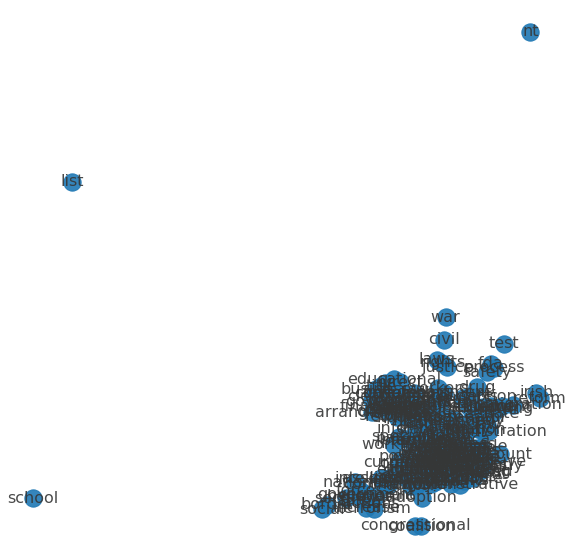

In [73]:
layout_amer = nx.spring_layout(g_american2, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
centralities_amer = nx.eigenvector_centrality(g_american2)
maxC = max(centralities_amer.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
nx.draw(g_american2, ax = ax, pos = layout_amer, labels = {n:n for n in g_american2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american2.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that render networks to meaningfully characterize the structure of words and documents (or subdocuments like chapters or paragraphs) from your corpus. What are useful filters and thresholds and what semantic structures do they reveal that give insight into the social world and social game inscribed in your corpus? Interrogate interesting subgraphs of your network and detail what they reveal about the semantic space involved.

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">在此之下構造單元格，使得呈現網絡以與語料庫中的單詞和文檔（或章節或段落）的結構的結構有意義地表徵。什麼是有用的過濾器和閾值以及他們揭示了哪些語義結構，以便在您的語料庫中銘刻社會世界和社交遊戲的洞察力？詢問您網絡的有趣子圖，並詳細介紹他們涉及的語義空間。

# Network Statistics 網絡統計數據
We can often gain more insight into our semantic network through statistics that describe the positions of words within it.  
我們通常可以通過描述其中內容中的單詞的位置的統計數據來獲得更多地洞察我們的語義網絡。
  
We begin with measures of centrality. The concept of centrality is that some nodes (words or documents) are more *central* to the network than others. The most straightforward is the notion of degree centrality: those nodes that have the highest number of connections are the most central. Here our measure normalizes the number of connections by those with the most connections.  
我們從中心的衡量標准開始。中心的概念是一些節點（單詞或文檔）比其他節點（單詞或文檔）更多*中心*。最簡單的是程度中心的概念：那些具有最多連接數量的節點是最中心的。在這裡，我們的衡量標準化了具有最多連接的人的連接數。

中心性（centrality）則是社會網路分析中常用到的概念，用來闡述某個節點(人)在網路中的重要程度。  
一般而言，中心性（centrality）有常見的三個衡量標準，  
就是本文標題揭示的度中心性(degree centrality )、介數中心性(betweenness centrality)及接近中心性(closeness centrality)  
參考來源[[Python]淺談社會網路分析(Social Network Analysis)的度中心性(degree centrality )、介數中心性(betweenness centrality)及接近中心性(closeness centrality)](https://medium.com/qiubingcheng/9b9f01c4d088)

degree_centrality：compute the degree centrality for nodes.

In [74]:
dcentralities = nx.degree_centrality(giant)

In [75]:
dcentralities['american']

0.035897435897435895

In [76]:
sorted(dcentralities.items(), reverse = True, key = lambda x:x[1])

[('health', 0.4153846153846154),
 ('loan', 0.21025641025641026),
 ('children', 0.21025641025641026),
 ('care', 0.1794871794871795),
 ('lenders', 0.13846153846153847),
 ('lender', 0.1282051282051282),
 ('loans', 0.1282051282051282),
 ('private', 0.11282051282051282),
 ('s', 0.11282051282051282),
 ('iraq', 0.1076923076923077),
 ('act', 0.08717948717948718),
 ('kennedy', 0.08205128205128205),
 ('college', 0.08205128205128205),
 ('families', 0.07692307692307693),
 ('students', 0.07692307692307693),
 ('family', 0.07692307692307693),
 ('education', 0.07692307692307693),
 ('program', 0.07179487179487179),
 ('president', 0.06153846153846154),
 ('need', 0.05641025641025641),
 ('medicare', 0.05641025641025641),
 ('states', 0.05128205128205128),
 ('senator', 0.05128205128205128),
 ('preferred', 0.05128205128205128),
 ('costs', 0.046153846153846156),
 ('information', 0.046153846153846156),
 ('chip', 0.046153846153846156),
 ('state', 0.046153846153846156),
 ('workers', 0.041025641025641026),
 ('cov

In [77]:
max(dcentralities.items(), key = lambda x : x[1])

('health', 0.4153846153846154)

By the way, why do we have .items() here? This is because decentralities is a dictionary.  
順便問一下，我們為什麼有.items（）在這裡？這是因為decentralities是字典。

We can color and size the nodes by betweenness centrality, it's much faster to redraw since we aren't redoing the layout.  
我們可以通過中心性之間的彩色和大小，因為我們沒有重做佈局，重繪速度要快得多。

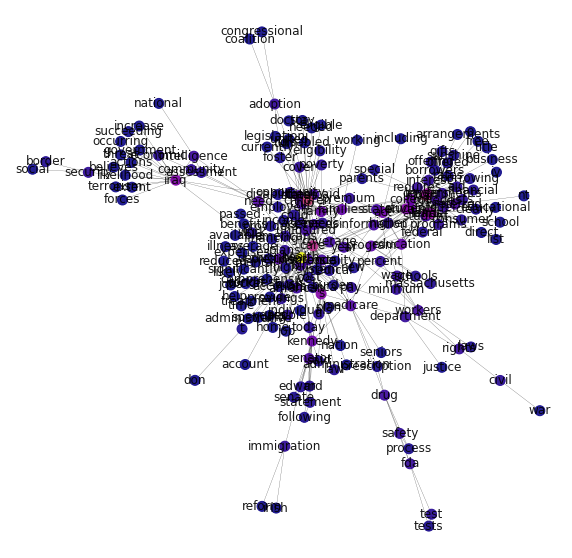

In [78]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(dcentralities.items(), key = lambda x : x[1])[1]
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = [dcentralities[n] / maxC for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

Another way to visualize the graph involes the use of size to represent degree centrality and edge weight:  
可視化圖形的另一種方法涉及使用大小來表示程度中心和邊緣重量：

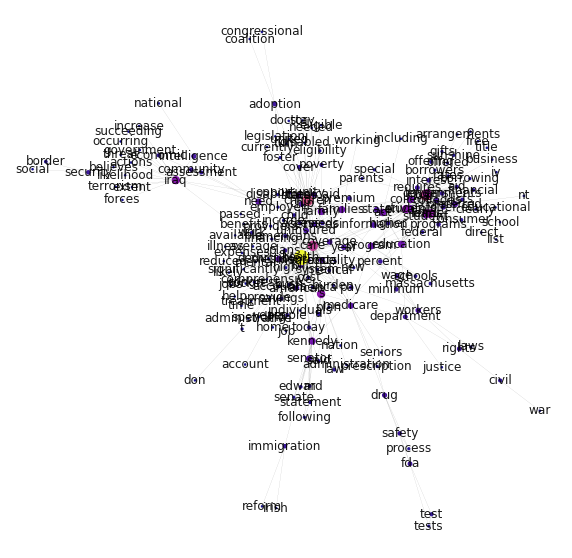

In [79]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(dcentralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gWord.edges(data = True)], 
        alpha = .9, 
        node_color = [dcentralities[n] / maxC for n in giant.nodes],
        node_size = [dcentralities[n] / maxC * 200 for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

The distrubution of degree centrality is:

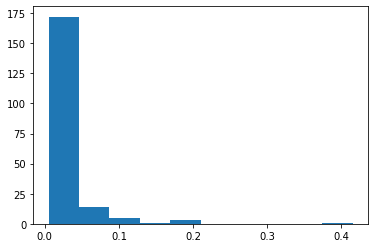

In [80]:
plt.hist(list(dcentralities.values()))
plt.show()

What are the top and bottom ten words in terms of degree?  
前十與後十

In [81]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('health', 0.4153846153846154),
 ('loan', 0.21025641025641026),
 ('children', 0.21025641025641026),
 ('care', 0.1794871794871795),
 ('lenders', 0.13846153846153847),
 ('lender', 0.1282051282051282),
 ('loans', 0.1282051282051282),
 ('private', 0.11282051282051282),
 ('s', 0.11282051282051282),
 ('iraq', 0.1076923076923077)]

In [82]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('justice', 0.005128205128205128),
 ('increase', 0.005128205128205128),
 ('stay', 0.005128205128205128),
 ('iv', 0.005128205128205128),
 ('reform', 0.005128205128205128),
 ('spending', 0.005128205128205128),
 ('administration', 0.005128205128205128),
 ('congressional', 0.005128205128205128),
 ('comprehensive', 0.005128205128205128),
 ('nation', 0.005128205128205128)]

Consider another very different measure, which is *betweenness* centrality. Betweenness centrality distinguishes nodes that require the most shortest pathways between all other nodes in the network. Semantically, words with a high betweenness centrality may link distinctive domains, rather than being "central" to any one. In other words, high *betweenness centrality* nodes may not have the highest *degree centrality*.  
  
考慮另一個非常不同的措施，這是*之間*中心。中心地位之間區分需要網絡中所有其他節點之間最短路徑的節點。語義上，具有高度中心地位的單詞可以將獨特的域聯接，而不是“中央”。換句話說，高*之間的中心性*節點可能沒有最高的*程度中心*。 

betweenness_centrality 介數中心性  


In [83]:
centralities = nx.betweenness.betweenness_centrality(giant)

In [84]:
centralities['american']

0.0005172261873292802

In [85]:
max(centralities.items(), key = lambda x : x[1])

('health', 0.4989136741610604)

We can color and size the nodes by betweenness centrality:  
我們可以通過中心中心的彩色和大小：

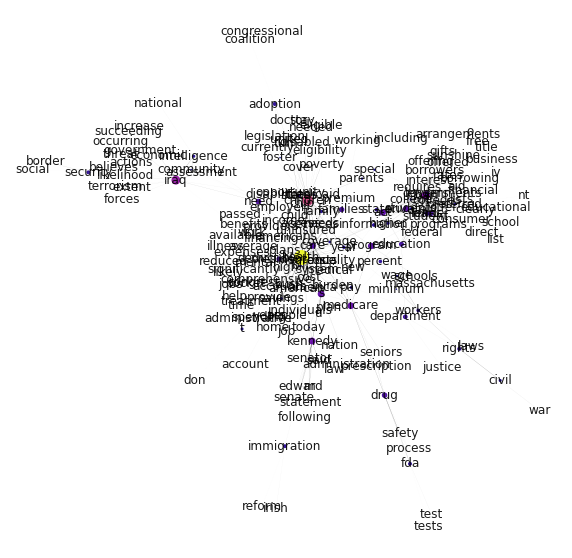

In [86]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(centralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in giant.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities[n] / maxC for n in giant.nodes],
        node_size = [centralities[n] / maxC * 200 for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

The distrubution of betweenness centrality is:

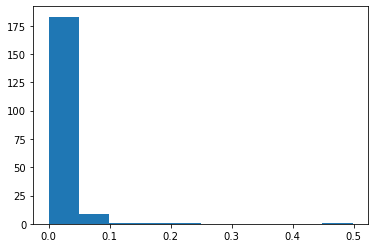

In [87]:
plt.hist(list(centralities.values()))
plt.show()

This is an exponential distrubution, but you might need to add more nodes to see it clearly.  
這是一個指數培訓，但您可能需要添加更多節點以清楚地查看。

What are the top ten words in terms of betweenness?
betweenness的十大詞是什麼？

In [88]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('health', 0.4153846153846154),
 ('loan', 0.21025641025641026),
 ('children', 0.21025641025641026),
 ('care', 0.1794871794871795),
 ('lenders', 0.13846153846153847),
 ('lender', 0.1282051282051282),
 ('loans', 0.1282051282051282),
 ('private', 0.11282051282051282),
 ('s', 0.11282051282051282),
 ('iraq', 0.1076923076923077)]

What are words lower down?

In [89]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[50:60]

[('safety', 0.02564102564102564),
 ('premium', 0.02564102564102564),
 ('programs', 0.02564102564102564),
 ('interest', 0.02564102564102564),
 ('higher', 0.02564102564102564),
 ('security', 0.02564102564102564),
 ('minimum', 0.02564102564102564),
 ('percent', 0.02564102564102564),
 ('cover', 0.02564102564102564),
 ('plans', 0.02564102564102564)]

We can also look at closeness centrality, or the average Euclidean or path distance between a node and all others in the network. A node with the highest closeness centrality is most likely to send a signal with the most coverage to the rest of the network.  
我們還可以看待接近中心性，或者節點與網絡中的所有其他人之間的平均歐幾里德或路徑距離。  
具有最近的中心性最高的節點最有可能向網絡其餘部分發送最大覆蓋的信號。

In [90]:
centralities = nx.closeness_centrality(giant)

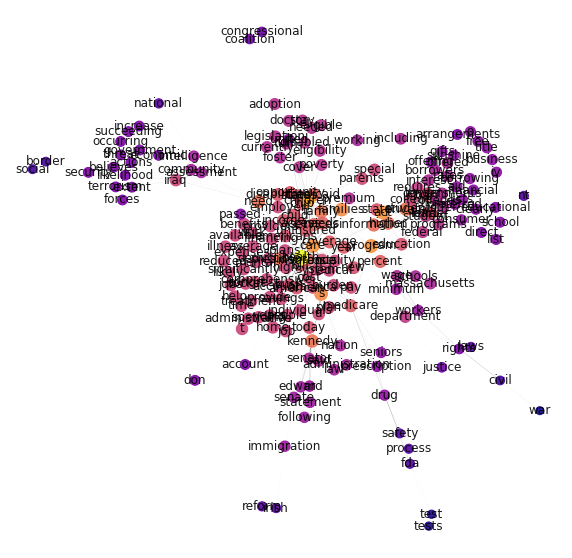

In [91]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(centralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in giant.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities[n] / maxC for n in giant.nodes],
        node_size = [centralities[n] / maxC * 200 for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

Top and bottom:

In [92]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('health', 0.527027027027027),
 ('children', 0.46099290780141844),
 ('care', 0.4401805869074492),
 ('act', 0.4391891891891892),
 ('program', 0.436241610738255),
 ('families', 0.42669584245076586),
 ('s', 0.42669584245076586),
 ('private', 0.407098121085595),
 ('family', 0.40625),
 ('need', 0.4045643153526971)]

In [93]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('nt', 0.2200902934537246),
 ('fda', 0.21934758155230596),
 ('safety', 0.21910112359550563),
 ('process', 0.21836506159014557),
 ('social', 0.20569620253164558),
 ('border', 0.20569620253164558),
 ('civil', 0.20333680917622524),
 ('test', 0.18022181146025879),
 ('tests', 0.18022181146025879),
 ('war', 0.1691240242844753)]

Or eignvector centrality, an approach that weights degree by the centrality of those to whom one is tied (and the degree to whom they are tied, etc.) In short, its an $n$th order degree measure.   
或者vector centrality，一種方法是那些被捆綁在一起的人的中心的方法（以及他們被捆綁的程度等）簡稱，它是$n$th的訂單學位措施。

特徵向量中心性 (Eigenvector centrality)

In [94]:
centralities = nx.eigenvector_centrality(giant)

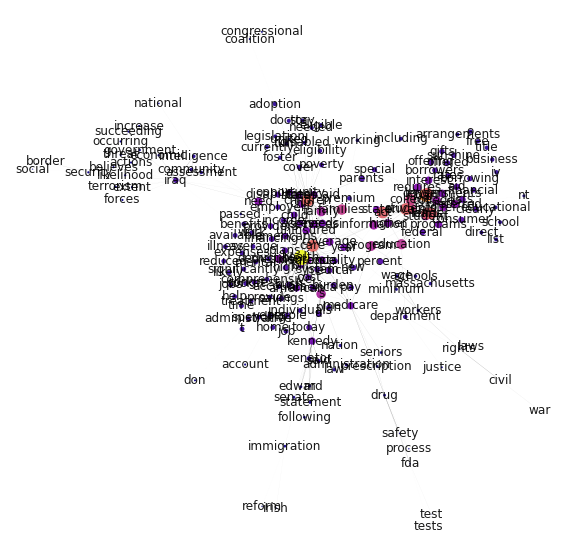

In [95]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(centralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in giant.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities[n] / maxC for n in giant.nodes],
        node_size = [centralities[n] / maxC * 200 for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

Note how the colors reveal a much more graduate distribution here. Let's look at it directly.

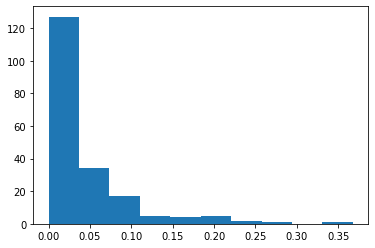

In [96]:
plt.hist(list(centralities.values()))
plt.show()

Top and bottom:

In [97]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('health', 0.36766749009470534),
 ('loan', 0.2719164741829186),
 ('children', 0.22640080443868574),
 ('care', 0.22308994175927838),
 ('private', 0.21586880198980243),
 ('act', 0.21256780592486493),
 ('lenders', 0.2125171596155819),
 ('loans', 0.21072929062918697),
 ('lender', 0.2088399342342636),
 ('college', 0.17436831947527942)]

In [98]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('fda', 0.000527527416151227),
 ('process', 0.0004834921387671031),
 ('irish', 0.00040320480866835553),
 ('reform', 0.00040320480866835553),
 ('border', 0.00022808969237990342),
 ('social', 0.00021169513868802078),
 ('civil', 0.0001880372554203447),
 ('test', 4.403527738412399e-05),
 ('tests', 4.108237181659774e-05),
 ('war', 1.3515206055114425e-05)]

We can now filter our network by a centrality measure. Let's define a function and experiment with it:  
我們現在可以通過中心測量來過濾我們的網絡。讓我們定義一個函數並用它試驗：

In [99]:
def filterWords(G, minWeight = 3, filter_ = "betweenness", rule = "number", value_of_rule = 200):
    """Function to filter network by degree centrality measures"""
    G = G.copy()
    try:
        G.remove_edges_from([(n1,n2) for n1, n2, d in G.edges(data = True) if d['weight'] < minWeight])
    except:
        print("weight might be missing from one or more edges")
        raise
    if filter_ =="betweenness":
        index = nx.betweenness_centrality(G) #betweeness centrality score
    elif filter_ == "closeness":
        index = nx.closeness_centrality(G) #closeness centrality score
    elif filter_ == "eigenvector":
        index = nx.eigenvector_centrality(G) #eigenvector centrality score
    elif filter_ == "degree":
        index = nx.degree_centrality(G) #degree centrality score
    else:
        raise ValueError("wrong filter paremeter, should be: betweenness/closeness/eigenvector")    
        
    if rule=='number':# if filter by limiting the total number of nodes 
        
        sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)
        value_of_rule = np.min([value_of_rule, len(G.nodes)])
        
        nodes_remain = {}
        for word, centr in sorted_index[:value_of_rule]:
            nodes_remain[word] = centr
        G.remove_nodes_from([n for n in index if n not in nodes_remain])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='above':# if filter by limiting the min value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] >=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='below':# if filter by limiting the max value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] <=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

In [100]:
giant_filtered30 = filterWords(giant, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(giant_filtered30))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 93
Average degree:   7.4400


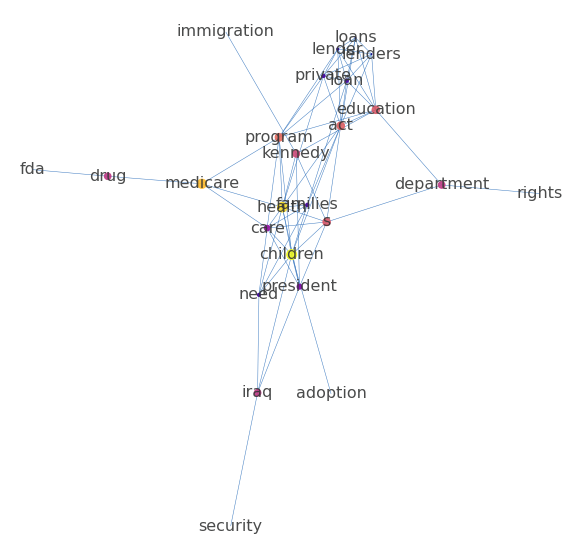

In [101]:
layout_giant_filtered30 = nx.spring_layout(giant_filtered30, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_giant30 = nx.betweenness_centrality(giant_filtered30)
maxC = max(centralities_giant30.items(), key = lambda x : x[1])[1]
nx.draw(giant_filtered30, ax = ax, pos = layout_giant_filtered30, labels = {n: n for n in giant_filtered30.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_giant30[n] / maxC for n in giant_filtered30.nodes],
        node_size = [centralities_giant30[n] / maxC * 100 for n in giant_filtered30.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

We can also look at global statistics, like the density of a network, defined as the number of actual edges divided by the total number of possible edges:  
  
我們還可以查看全局統計數據，如網絡的密度，定義為實際邊緣的數量除以可能的邊緣總數：

In [102]:
nx.density(giant)

0.026687598116169546

We can also calculate the average degree per node:  
  
我們還可以計算每個節點的平均度：

In [103]:
np.mean([v for w,v in nx.degree(giant)])

5.204081632653061

The diameter calculates the average distance between any two nodes in the network:  
  
直徑計算網絡中的任何兩個節點之間的平均距離：

In [104]:
nx.diameter(giant)

9

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that calculate different kinds of centrality for distinct words or documents in a network composed from your corpus of interest. Which type of words tend to be most and least central? Can you identify how different centrality measures distinguish different kind of words in your corpus? What do these patterns suggest about the semantic content and structure of your documents? Finally, calculate global measure for your network(s) and discuss what they reveal.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">構建在此下方的細胞，計算由您感興趣的語料庫組成的網絡中的不同詞語或文檔的不同類型的中心。哪種單詞往往是最不最低的中樞？您能確定不同的中心地位措施如何區分語料庫中的不同類型的單詞？這些模式對文檔的語義內容和結構建議了什麼？最後，計算您的網絡的全球措施，並討論他們揭示的內容。

# POS based networks

Now let's look at links between specific parts of speech within a network.



Let's look at nouns co-occurring in sentences using the top 10 (by score) reddit posts on thread topics we have explored in prior sessions:   
  
現在讓我們看一下網絡內的特定詞組之間的鏈接。



讓我們來看看使用前10名（按得分）Reddit Posts在先前會議上探索的Top 10（按得分）Reddit Post中的名詞：

In [105]:
redditDF = pandas.read_csv('../data/reddit.csv', index_col = 0)

In [106]:
redditTopScores = redditDF.sort_values('score')[-100:]
redditTopScores['sentences'] = redditTopScores['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
redditTopScores.index = range(len(redditTopScores) - 1, -1,-1) #Reindex to make things nice in the future
redditTopScores[:3]

author  over_18  score                subreddit  \
99  jimmy_three_shoes    False   4990  Tales From Tech Support   
98         badbfriend    False   5034            Relationships   
97             Fafrdr    False   5146            Relationships   

                                                 text  \
99  This happened a little while ago, when I was c...   
98  https://www.reddit.com/r/relationships/comment...   
97  First post: https://www.reddit.com/r/relations...   

                                                title  \
99   We've tried nothing, and we're all out of ideas!   
98  Me [29 M] with my g/f [27 F] together 4 years,...   
97  Update - My [16F] father [59M] acts creepy tow...   

                                                  url  \
99  https://www.reddit.com/r/talesfromtechsupport/...   
98  https://www.reddit.com/r/relationships/comment...   
97  https://www.reddit.com/r/relationships/comment...   

                                            sentences  
99  [[This, happened, a, little, while, ago, when,...  
98  [[https://www.reddit.com/r/relationships/comme...  
97  [[First, post, https://www.reddit.com/r/relati...

Let's look at a few things here, especially some things about Pandas that might come in handy later on.

First, sort_values('score'): sort_values is a function used for Pandas DataFrame to literally sort the values. Here, it sorts the values from the lowest one to the highest one. So, by doing "redditDF.sort_values('score')[-100:]", it gets us 100 rows, from the 100th highest one (-99) to the highest one (0). Why not -100 and 1 rather than -99 and 0? That's just how Python works.

Second, .index: it literally gives you the index of the Pandas DataFrame. You can also reindex the indices here. But what does "range(len(redditTopScores) - 1, -1,-1)" do? It generates a range from len(redditTopScores)-1 to -1 by increments of -1. So, a range from 99 to -1, by -1, i.e., 99, 98, 97...0.  
  
讓我們看看這裡的一些事情，尤其是關於熊貓的事情可能會在稍後派上用場。

首先，sort_values（'score'）：sort_values是用於pandas dataframe的函數，以字面上排序值。在這裡，它將最低一個值從最低一個排序。所以，通過執行“redditDF.sort_values('score')[-100:]”，它得到100行，從100個最高一個（-99）到最高一個（0）。為什麼不-100和1而不是-99和0？這就是Python如何工作。

其次，.index：它字面意思為您提供Pandas DataFrame的索引。您還可以在此處重新銘牌。但“範圍（Len（Reddittopscores） -  1，-1，-1）”做了什麼？它通過-1的增量生成從LEN（RENDOPSCORS）-1到-1的範圍。因此，從99到-1，by -1，i.，99,98,97 ... 0的範圍。  

Now we'll normalize the tokens through stemming:

In [107]:
redditTopScores['normalized_sents'] = redditTopScores['sentences'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

We will revisit spacy and use it's english language model.

In [110]:
import spacy

In [111]:
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

In [112]:
def posCooccurrence(sentences, *posType, makeMatrix = False):
    words = set()
    reducedSents = []
    #Only using the first kind of POS for each word
    wordsMap = {}
    for sent in sentences:
        s = [(w, t) for w, t in lucem_illud_2020.spacy_pos(sent) if t in posType]
        for w, t in s:
            if w not in wordsMap:
                wordsMap[w] = t
        reducedSent = [w for w, t in s]
        words |= set(reducedSent)
        reducedSents.append(reducedSent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in reducedSents:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        for w in g.nodes:
            g.nodes[w]['bipartite'] = wordsMap[w]
        return g

In [113]:
gNN = posCooccurrence(redditTopScores['normalized_sents'].sum(), 'NN')

In [114]:
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 2243
Number of edges: 12050
Average degree:  10.7445


This is a bit too large to effectively visualize, so let's remove the vertices with degree less than or equal to 100:  
這有點太大，無法有效可視化，因此讓我們從小或等於100的程度刪除頂點：

In [115]:
gNN.remove_nodes_from([n for n in gNN.nodes if len(set(gNN.neighbors(n))) <= 100]) 
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 19
Number of edges: 128
Average degree:  13.4737


And low weight edges:  
和低重量邊緣：

In [116]:
gNN.remove_edges_from([(n1, n2) for n1, n2, d in gNN.edges(data = True) if d['weight'] <= 2])
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 19
Number of edges: 53
Average degree:   5.5789


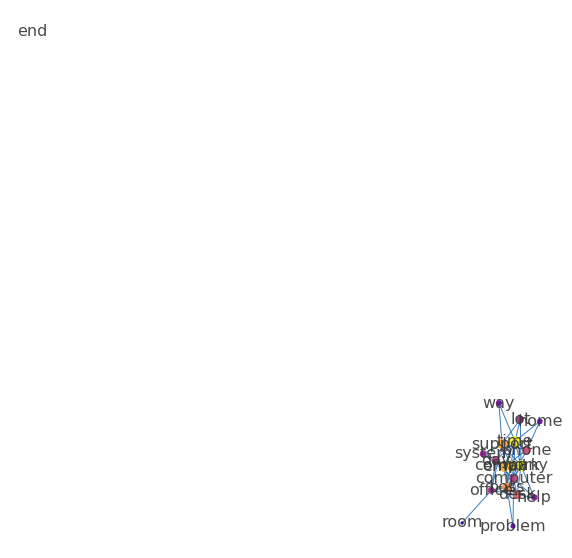

In [117]:
layout_nn = nx.spring_layout(gNN, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nn = nx.eigenvector_centrality(gNN)
maxC = max(centralities_nn.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNN.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNN.edges(data = True)))
nx.draw(gNN, ax = ax, pos = layout_nn, labels = {n: n for n in gNN.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nn[n] / maxC for n in gNN.nodes],
        node_size = [centralities_nn[n] / maxC * 100 for n in gNN.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

This makes sense: people are talking about work, support, computers, time... it's a tech support forum, so these are expected connections.    
  
這是有道理的：人們正在談論工作，支持，電腦，時間......這是一個技術支持論壇，所以這些是預期的聯繫。

What if we want to look at noun-verb pairs instead?  
如果我們想看看名詞 - 動詞對，那麼怎麼辦？

In [171]:
gNV = posCooccurrence(redditTopScores['normalized_sents'].sum(), 'NN', 'VB')

`gNV` has co-occurrences between nouns and nouns as well as between verbs and verbs. Let's remove these and make it purely about noun and verb combinations:  
`gNV` 在名詞和名詞之間以及動詞和動詞之間有共同發生。讓我們刪除這些，並純粹地讓它與名詞和動詞組合：

In [172]:
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 2378
Number of edges: 14749
Average degree:  12.4045


In [173]:
gNV.remove_edges_from([(n1,n2) for n1,n2,d in gNV.edges(data = True) if gNV.nodes[n1]['bipartite'] == gNV.nodes[n2]['bipartite']])

In [174]:
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 2378
Number of edges: 2636
Average degree:   2.2170


Dropping low weight edges and low degree vertices gives us:  
丟掉低

In [175]:
gNV.remove_edges_from([(n1, n2) for n1, n2, d in gNV.edges(data = True) if d['weight'] <= 2])
gNV.remove_nodes_from([n for n in gNV.nodes if len(set(gNV.neighbors(n))) <= 2])

In [176]:
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 12
Number of edges: 7
Average degree:   1.1667


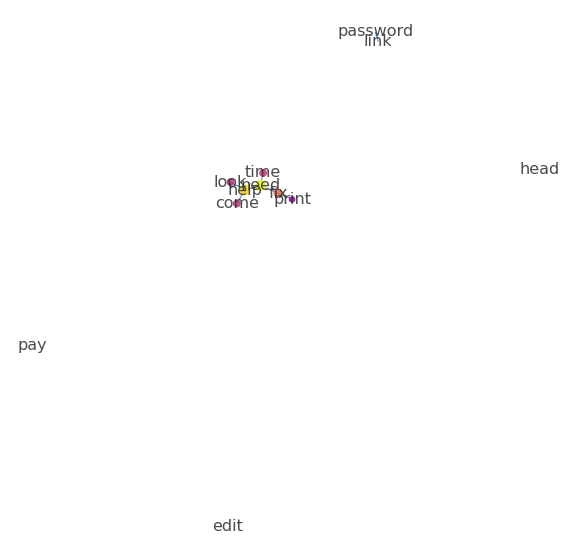

In [177]:
layout_nn = nx.spring_layout(gNV, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nv = nx.eigenvector_centrality(gNV)
maxC = max(centralities_nv.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNV.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNV.edges(data = True)))
nx.draw(gNV, ax = ax, pos = layout_nn, labels = {n: n for n in gNV.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nv[n] / maxC for n in gNV.nodes],
        node_size = [centralities_nv[n] / maxC * 100 for n in gNV.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       ) 

Lets create an "ego network" surrounding a single (important) word, as we did before:  
讓我們創建一個“自我網絡”周圍的單個（重要​​的）字，正如我們之前所做的那樣：

In [178]:
g_i = gNV.subgraph(['work'] + list(gNV.neighbors('work')))

NetworkXError: The node work is not in the graph.

In [ ]:
print(nx.info(g_i))

In [ ]:
nx.draw_networkx(g_i)

Instead of just nodes connected to a vertex, we can find all those connected to it within 2 hops, lets look at 'look' (+ points for being meta) for this:  
而不是連接到頂點的節點，我們可以在2個跳中找到連接到它的所有連接，讓我們看一下它的“看起來”（+積分）：

In [ ]:
storyNeighbors = gNV.neighbors('look')
set(storyNeighbors)

In [ ]:
storyNeighbors = set(gNV.neighbors('look'))
storyNeighborsPlus1 = set(storyNeighbors)
for n in storyNeighbors:
    storyNeighborsPlus1 |= set(gNV.neighbors(n))

In [ ]:
gNV_story = gNV.subgraph(storyNeighborsPlus1)
print(nx.info(gNV_story))

This is a mid-sized network, but we can interrogate it intelligently by computing some statistics. Degree centrality:

In [ ]:
sorted(nx.degree_centrality(gNV_story).items(), key = lambda x: x[1], reverse = True)[:10]

Or eigenvector centrality:

In [ ]:
sorted(nx.eigenvector_centrality(gNV_story).items(), key = lambda x: x[1], reverse = True)[:10]

Lets plot it:

In [ ]:
layout_story = nx.spring_layout(gNV_story, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(gNV_story, ax = ax, pos = layout_story, labels = {n: n for n in gNV_story.nodes()},
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
       ) 

Lets create a noun-adjective network:  
讓我們創建一個名詞形容詞網絡：

In [ ]:
gNJ = posCooccurrence(redditTopScores['normalized_sents'][:100].sum(), 'NN', 'JJ')
print(nx.info(gNJ))

By filtering by a centrality measure we can get a more 'central' set of nodes instead of just the most connected.  
通過通過中心測量過濾，我們可以獲得更多“中央”節點，而不是最連接的節點。

In [ ]:
gNJ_filtered200 = filterWords(gNJ, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(gNJ_filtered200))

In [ ]:
layout_NJ_filtered200 = nx.spring_layout(gNJ_filtered200, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nj200 = nx.betweenness_centrality(gNJ_filtered200)
maxC = max(centralities_nj200.items(), key = lambda x : x[1])[1]
nx.draw(gNJ_filtered200, ax = ax, pos = layout_NJ_filtered200, labels = {n: n for n in gNJ_filtered200.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_nj200[n] / maxC for n in gNJ_filtered200.nodes],
        node_size = [centralities_nj200[n] / maxC * 100 for n in gNJ_filtered200.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that construct at least two different networks comprising different combinations of word types, linked by different syntactic structures, which illuminate your corpus and the dynamics you are interested to explore. Graph these networks or subnetworks within them. What are relationships that are meaningful? 

<span style="color:red">***Stretch***: Graph some word-centered "ego-networks" with words one link away, two links away, and three links away (we only did up to two links away above).

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">在此之下構造單元格，該單元構造至少兩個不同的網絡，該網絡包括由不同的語法結構鏈接的單詞類型的不同組合，它照亮了您的語料庫和您有興趣探索的動態。圖表中的這些網絡或子網。什麼是有意義的關係？

<span style="color:red">***伸展***：圖為一些以字樣的“自我網絡”，單詞一條鏈接，兩個鏈接，三個環節（我們只採取兩台鏈接）。

## Creating networks of agents from corpora

Now that we have an idea of how we can use networks in python (a useful skill to know!), let us see how we can now use our knowledge of networks on extracting actors from corpora and building relations from them. Let us use the soap opera corpus now. 

In the last notebook we wrote methods to load corpora - this has been added to lucem_illud_2020.
The code returns a dictionary with each id mapping to the text associated with it. 

We would then use the source file to create the dataframe with the data - since this varies for each corpora, there is no built in function, but would follow a similar process.

This function might take some time.  
  
既然我們知道如何在Python中使用網絡（一個有用的技能來了解！），讓我們了解我們現在如何利用我們對從公司提取行動者和建立與他們建立關係的網絡知識。讓我們現在使用SOAP Opera語料庫。在最後一個筆記本中，我們編寫了加載語料庫的方法 - 這已被添加到Lucem_illud_2020。
代碼將每個ID映射返回到與其關聯的文本的每個id映射。然後，我們將使用源文件與數據創建DataFrame  - 由於這對每個語料庫都有所不同，因此沒有內置功能，但將遵循類似的過程。

此功能可能需要一段時間。

In [120]:
corpora_address = "/Users/bhargavvader/Downloads/Academics_Tech/corpora/SOAP"

In [121]:
soap_texts = lucem_illud_2020.loadDavies(corpora_address, num_files=2000)

text_7-jss.zip
text_6-egn.zip
text_5-rag.zip
text_2-wts.zip
text_3-pem.zip
text_4-jfy.zip
text_8-sbo.zip
text_9-jtw.zip
text_0-tez.zip
text_1-teh.zip


We now use the source to see how the data is stored. Note that this is different from the movies corpus, and that we will need to use a different aggregating method to store the data. Each dataset would have a different approach, but they are all very similar, it depends on how the data is stored. Here multiple textids match multiple scripts, so our soap dataframe would be structured a little differently. 

You can see the first 20 lines of the source file here.

In [122]:
import zipfile

In [123]:
zfile = zipfile.ZipFile(corpora_address + "/soap_sources.zip")
source = []

In [124]:
for file in zfile.namelist():
    with zfile.open(file) as f:
        for line in f:
            source.append(line)

In [125]:
source[0:20]

[b'textID\tyear\tshow\t\turl\r\n',
 b'-----\t-----\t-----\t\t-----\r\n',
 b'\r\n',
 b'1\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-04-09-01.shtml\r\n',
 b'2\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-05-09-01.shtml\r\n',
 b'3\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-06-20-01.shtml\r\n',
 b'4\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-08-07-01.shtml\r\n',
 b'5\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-08-08-01.shtml\r\n',
 b'6\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-08-09-01.shtml\r\n',
 b'7\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-08-10-01.shtml\r\n',
 b'8\t2001\tAll My Childen\thttp://tvmegasite.net/transcripts/amc/older/2001/amc-trans-08-13-01.shtml\r\n',
 b'9\t2001\tAll My Childen\thttp://tvmegasite.net/tra

In [126]:
import pandas as pd

In [127]:
soap_dict = {}

In [128]:
for soap in source[3:]:
    try:
        textID, year, show, url = soap.decode("utf-8").split("\t")
    except UnicodeDecodeError:
        continue
    if show.strip() not in soap_dict:
        soap_dict[show.strip()] = []
    if show.strip() in soap_dict:
        try:
            soap_dict[show.strip()].append(soap_texts[textID.strip()])
        except KeyError:
            continue

In [129]:
soap_dict.keys()

dict_keys(['All My Childen', 'As the World Turns', 'Bold and Beautiful', 'Days of Our Lives', 'General Hospital', 'Guiding Light', 'One Life to Live', 'Passions', 'Port Charles', 'Young and Restless'])

In [130]:
soap_df = pd.DataFrame(columns=["Soap Name", "Tokenized Texts"])

In [131]:
i = 0

In [132]:
for soap in soap_dict:
    # since there were multiple lists
    print(soap)
    full_script = []
    for part in soap_dict[soap]:
        full_script = full_script + part
    soap_df.loc[i] = [soap, full_script]
    i += 1

All My Childen
As the World Turns
Bold and Beautiful
Days of Our Lives
General Hospital
Guiding Light
One Life to Live
Passions
Port Charles
Young and Restless


In [133]:
soap_df

Soap Name                                    Tokenized Texts
0      All My Childen  [@!Reporter, Is, there, anything, you, regret,...
1  As the World Turns  [@!Katie, Okay, I, know, these, words, are, lo...
2  Bold and Beautiful  [@!Bridget, What, did, you, say, @!Deacon, Jus...
3   Days of Our Lives  [@!Maggie, How, are, you, doing, @!Victor, Fin...
4    General Hospital  [@!Luke, I, signed, my, divorce, papers, You, ...
5       Guiding Light  [@!Dax, I, take, it, everything, is, well, wit...
6    One Life to Live  [@!Blair, Excuse, me, @!Todd, Why, Did, you, d...
7            Passions  [@!Julian, Let, 's, drink, up, It, 's, not, ev...
8        Port Charles  [@!Frank, Hey, @!Karen, Hey, You, still, on, d...
9  Young and Restless  [@!Katherine, Any, sign, of, your, daddy, swee...

We now have each Soap, and each of the Tokenized texts. Let us see what kind of information we can get. These are American soap operas, and are likely to be cheesy and dramatic (an understatment). A fun start would be to make networks of each of the actors and actresses in these soaps. 

What would be a good way to create a network? Maybe everytime someone talks to someone we add one weight? But we wouldn't want to add weights whenever it's a different scene - or maybe we do? Let us look at the text and figure it out.

Note that we didn't add the year here because it spans over multiple years. If we are doing different kinds of analysis we would want to a years column as well.

In my dataframe, Days of Our Lives is the 4th corpora, and I conducted my basic analysis on that.  
  
我們現在擁有每個SOAP，以及每個令牌化的文本。讓我們看看我們能得到什麼樣的信息。這些是美國肥皂劇，並且可能是俗氣和戲劇性的（輕描淡寫）。一個有趣的啟動將是在這些肥皂中製作每個演員和女演員的網絡。創建網絡是什麼好方法？也許每次有人與某人談論我們加重？但我們不想每當它是一個不同的場景時增加體重 - 或者我們也許我們這樣做？讓我們看看文本並搞清楚。

請注意，我們在這裡沒有添加年份，因為它跨越多年。如果我們正在做不同的分析，我們也想要多年的專欄。

在我的DataFrame中，我們生活的日子是第4基金會，我對此進行了基本分析。

In [134]:
dool = soap_df['Tokenized Texts'][3]

 join() 是一個連接字符的功能，可以以指定分隔符號連接生成一個新的字符串。

In [135]:
' '.join(dool[0:1500])

"@!Maggie How are you doing @!Victor Fine @!Nicole Humming this ought to ease the pain @!Victor You wo n't be offended if I tell you I 'm not in the mood @!Nicole Oh come on @!Victor Looking around at what 's been going on here I hardly see what we have to toast to @!Nicole How about to us To survivors @!Maggie You all right @!Nicole Yeah @!Maggie Okay @!Philip Hey Chloe @!Chloe How 's Lexie @!Philip Does n't look so good but John and Marlena did everything they can How are you How are you holding up @!Chloe I 'm fine Philip okay I just need to be alone @!John It 's not enough Wounds are too severe @!Marlena We have no choice She 's got to get to the hospital @!Maggie Okay @!Hope Is there any news @!Maggie Mickey said there were explosions all over town and no one knows why Most of the roads are still blocked and they 're telling My daughter There 's no time We have to get her to the hospital @!Maggie Even if the roads were clear Stefano the ambulances are all in use There are victims 

Hmmm... we can't do our normal text processing. But this provides us with an interesting oppurtunity: every '@!' is followed by some useeful information. Let us do a quick check of how many characters exist here, and how many times they speak.  
  
嗯......我們不能做我們的正常文本處理。但這為我們提供了一個有趣的對抗性：每個'@！'其次是一些使用的信息。讓我們快速檢查這裡存在多少個字符，以及他們說多少次。

計算人物出現次數

In [136]:
characters = {}

In [137]:
for token in dool:
    if token[0] == '@':
        # all characters or actions start with @, so we add that to character
        if token[2:] not in characters:
            characters[token[2:]] = 0
        if token[2:] in characters:
            characters[token[2:]] += 1


In [138]:
len(characters)

833

Wow, that's a lot of characters: but we notice a '@!' between certain actions too, such as screaming and sobbing. Let us maybe only look for characters with a high number of appearances?   
  
哇，這是很多人物：但我們注意到'@！'在某些行動也在，如尖叫和哭泣。讓我們只能尋找具有大量出現數量的字符？

In [139]:
for character in characters:
    if characters[character] > 2000:
        print(character, characters[character])

Nicole 3399
Philip 2568
John 2403
Hope 3520
Belle 2783
Shawn 2952
Brady 2183
Jennifer 2163
Bo 3830
Sami 5246
Kate 2419
Lucas 2380


Let's check these folks out on the interwebz...a image of search of the name + "days of our lives":  
讓我們在Interwebz上檢查這些人......一個搜索名稱+“days of our lives”的形象：

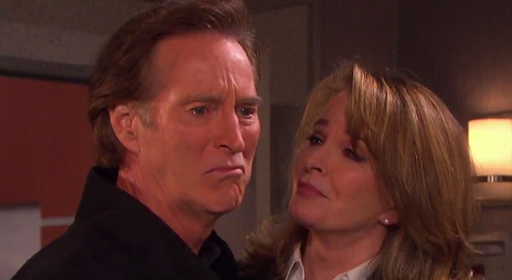

In [88]:
Image(filename='../data/dool/dool_john.png') 

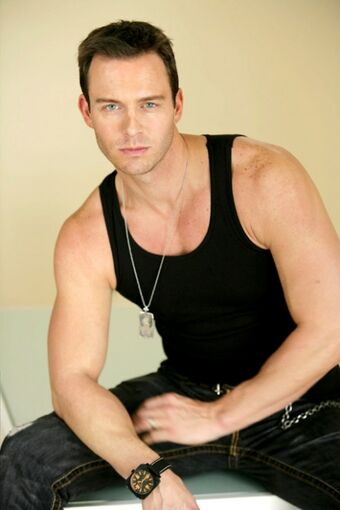

In [89]:
Image(filename='../data/dool/dool_brady.jpg') 

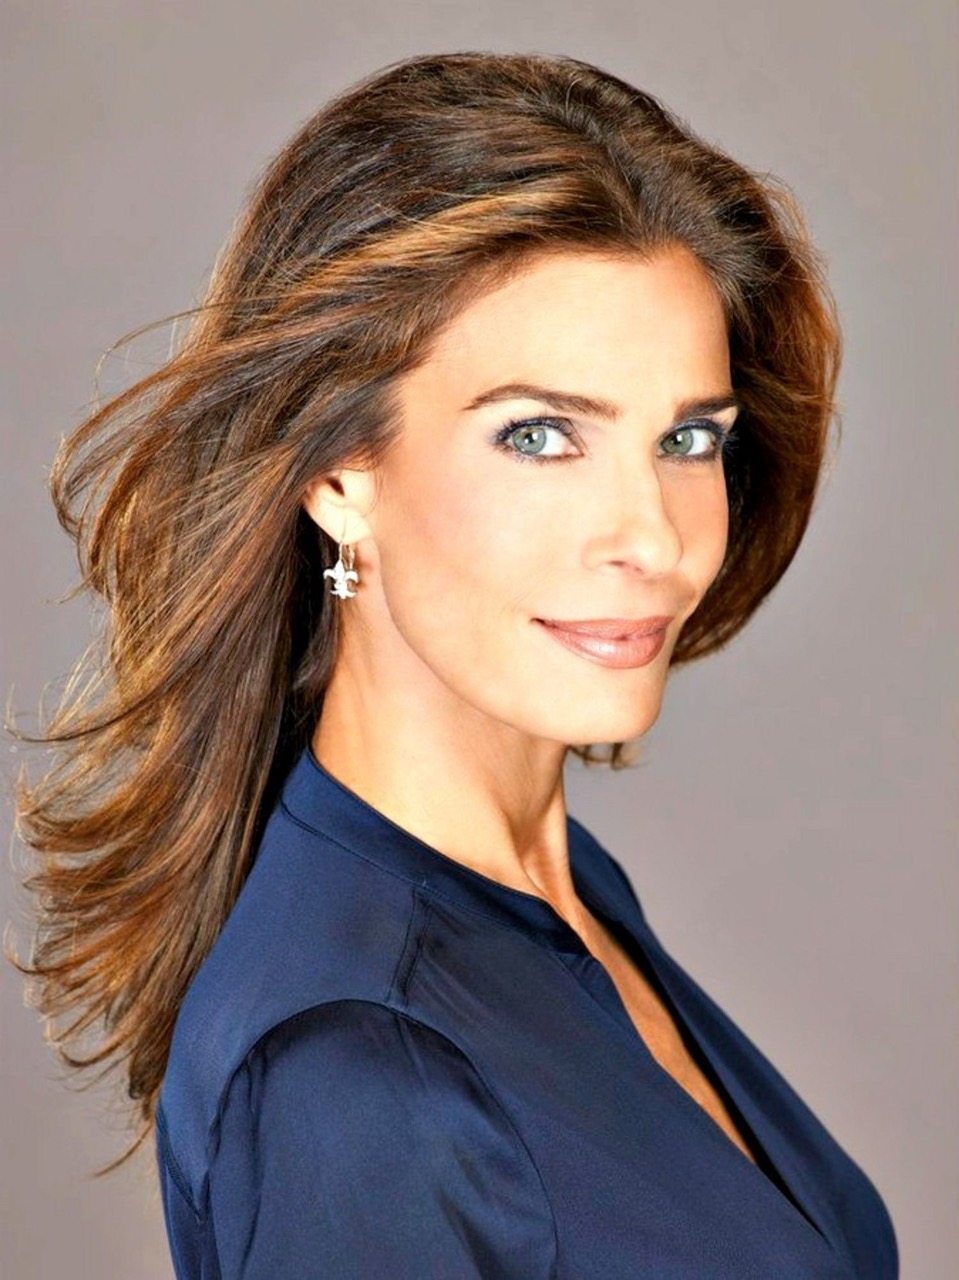

In [90]:
Image(filename='../data/dool/dool_hope.jpeg')

In [91]:
# Image(filename='../data/dool/dool_philip.jpeg')

In [92]:
# Image(filename='../data/dool/dool_marlena.jpg')

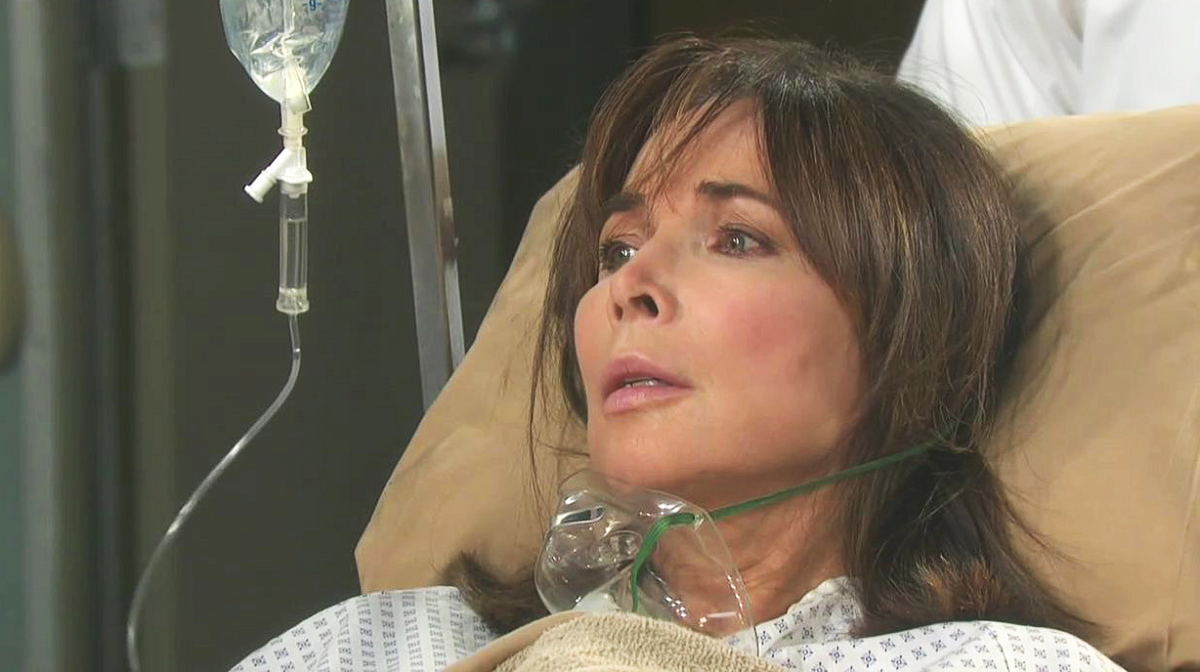

In [93]:
Image(filename='../data/dool/dool_kate.png')

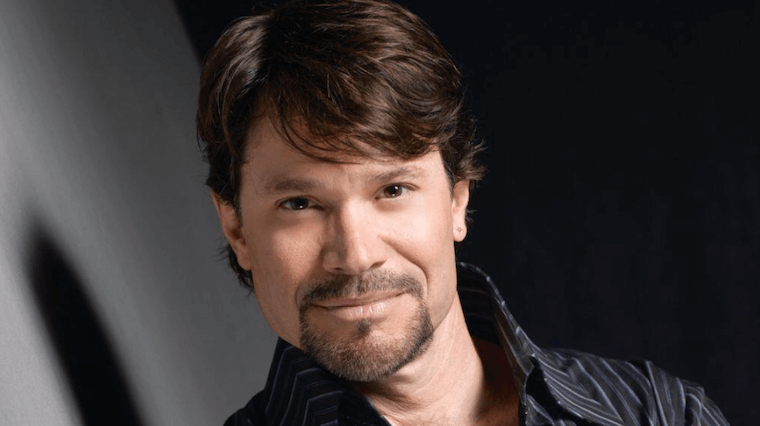

In [94]:
Image(filename='../data/dool/dool_bo.png')

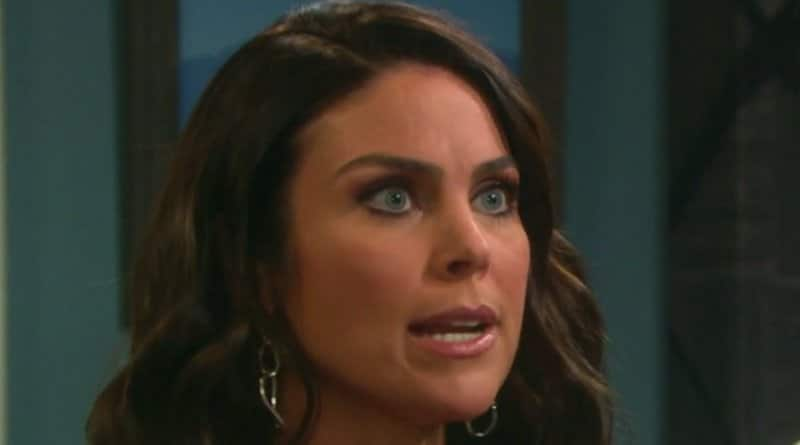

In [95]:
Image(filename='../data/dool/dool_chloe.jpg')

In [96]:
# Image(filename='../data/dool/dool_sami.jpg')

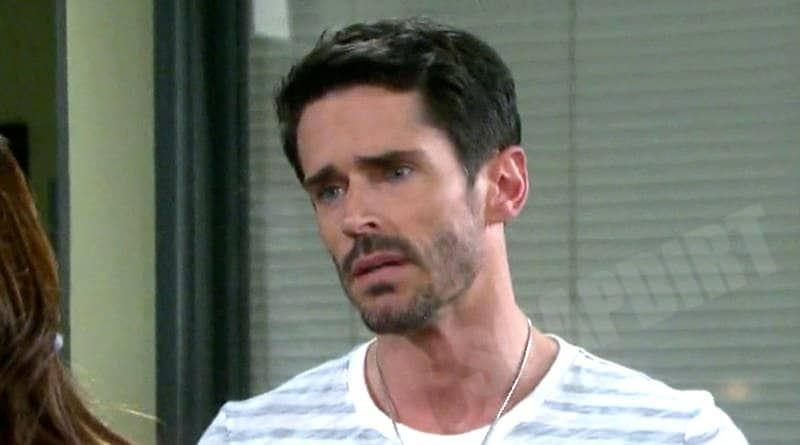

In [97]:
Image(filename='../data/dool/dool_shawn.jpg')

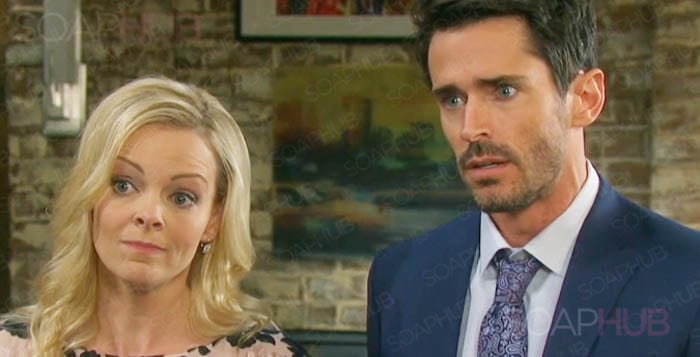

In [98]:
Image(filename='../data/dool/dool_belle.jpg')

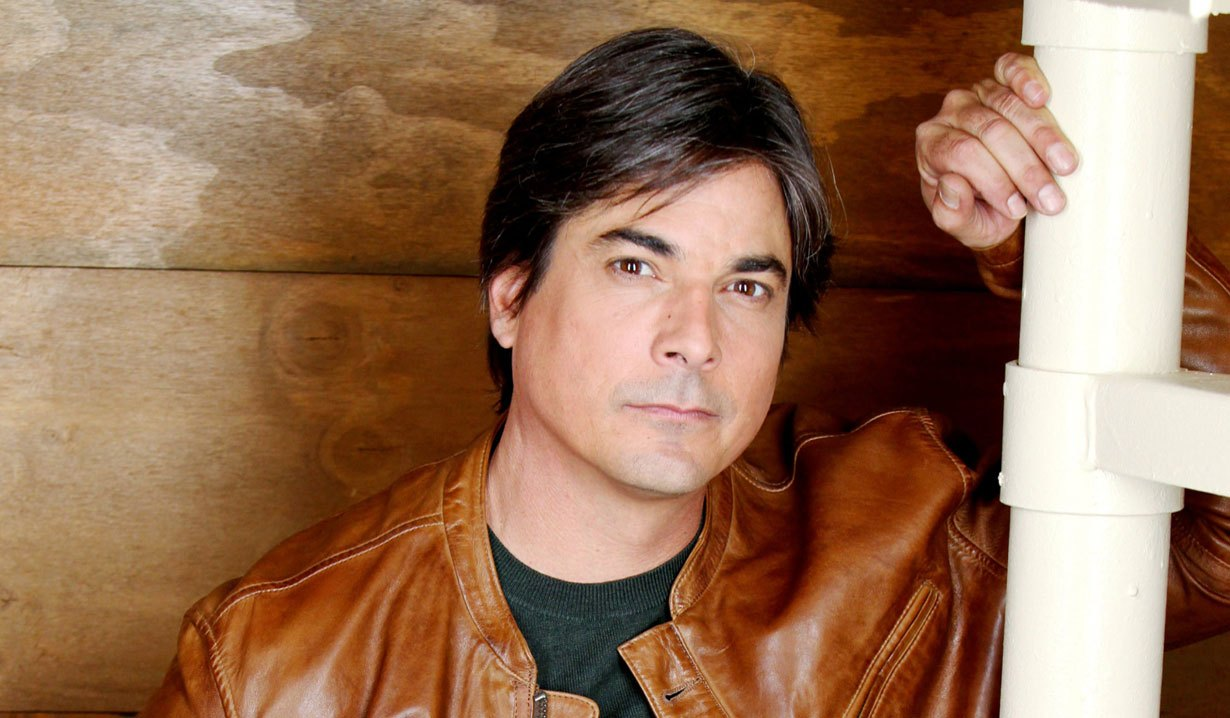

In [99]:
Image(filename='../data/dool/dool_lucas.jpg')

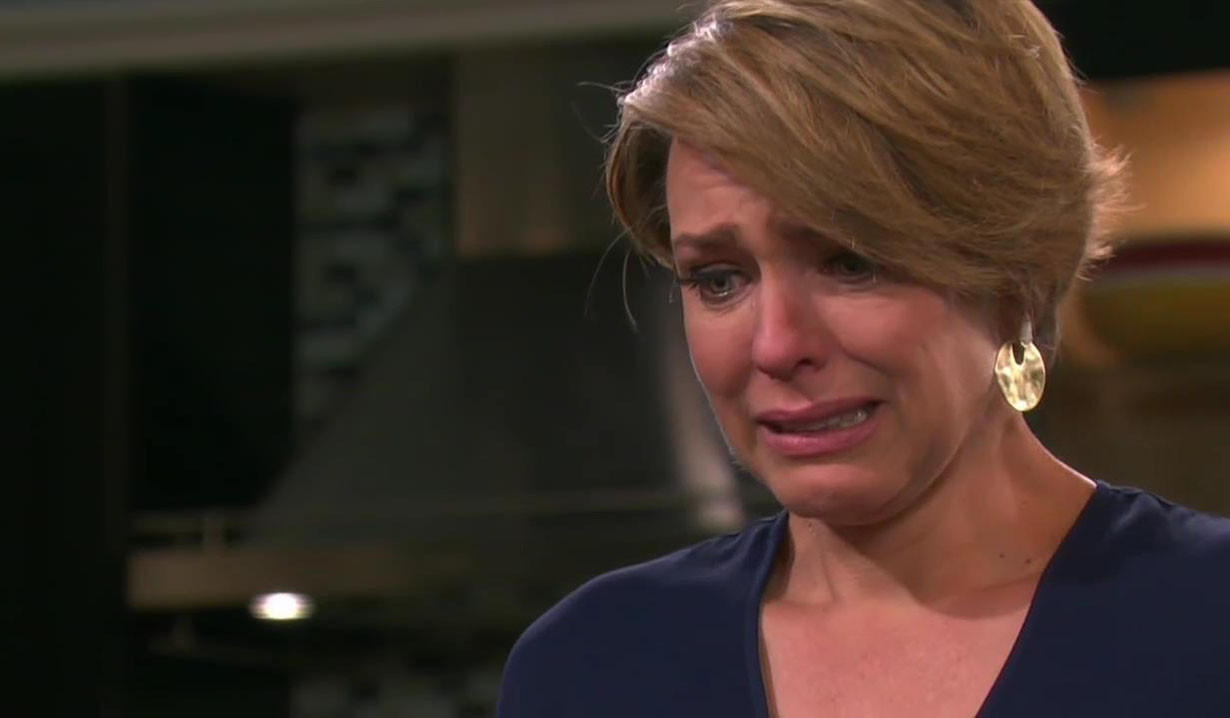

In [100]:
Image(filename='../data/dool/dool_nicole.jpg')

These are definitely big, long-time players in the dramatic Days narrative. It would make sense to create a graph where each character who appears over 2000 times is a node, and each time they talk to each other, we add one to their weight. We should also store all the things these chracters say: that's useful information.

So we now iterate through the tokens in a manner where we can capture this information.  
  
這些絕對是大型的長期球員在戲劇性的日子敘事中。創建一個圖形是有意義的，其中一個呈現超過2000次的角色是一個節點，每次彼此交談時，我們都會增加一個到他們的體重。我們還應該存儲這些Chracters所說的所有事情：這是有用的信息。

所以我們現在以我們可以捕獲此信息的方式迭代令牌。

In [101]:
actor_network = nx.Graph()

In [102]:
for character in characters:
    if characters[character] > 2000:
        actor_network.add_node(character, lines_spoken= characters[character], words=[])

NameError: name 'characters' is not defined

In [103]:
len(actor_network.nodes.data())

0

In [104]:
actor_network.nodes.data()

NodeDataView({})

In [105]:
actor_network.nodes['Sami']['lines_spoken']

KeyError: 'Sami'

In [106]:
i = 0

The following lines of code creates the graph. Please carefully go through the code: you should be able to understand (more or less) what is going on here.    
以下代碼行創建圖形。請仔細通過代碼：您應該能夠理解（或多或少）這裡發生的事情。

In [107]:
for token in dool:
    i += 1
    if i > len(dool):
        break
    if token[0] == "@":
        if token[2:] in actor_network.nodes():
            j = i
            for token_ in dool[i:]:
                if token_[0] == "@":
                    # if both the characters exist in the graph, add a weight
                    if token_[2:] != token[2:] and token_[2:] in actor_network.nodes():
                        if (token[2:], token_[2:]) not in actor_network.edges():
                            actor_network.add_edge(token[2:], token_[2:], weight=0)
                        if (token[2:], token_[2:]) in actor_network.edges():
                            actor_network.edges[(token[2:], token_[2:])]['weight'] += 1
                    break
                j += 1
            # adding characters sentences
            actor_network.nodes[token[2:]]['words'].append(dool[i:j])

NameError: name 'dool' is not defined

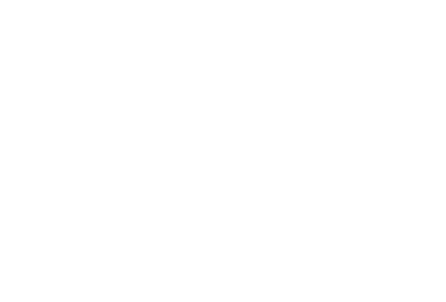

In [108]:
nx.draw(actor_network, with_labels=True, font_weight='bold')

In [109]:
import seaborn as sns

In [110]:
L = []
for node in actor_network.nodes():
    l = []
    for node_ in actor_network.nodes():
        if node == node_:
            l.append(0)
        else:
            l.append(actor_network.edges[(node, node_)]['weight'])
    L.append(l)
M_ = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M_, columns = list(actor_network.nodes()), index = list(actor_network.nodes()))
ax = sns.heatmap(div)
plt.show()

ValueError: Empty data passed with indices specified.

<Figure size 432x288 with 0 Axes>

In [163]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(actor_network))

In [164]:
c

[frozenset({'Belle',
            'Bo',
            'Brady',
            'Hope',
            'Jennifer',
            'John',
            'Kate',
            'Lucas',
            'Nicole',
            'Philip',
            'Sami',
            'Shawn'})]

### Finding structure in networks

We now have a lot of useful information: we have a graph of all the characters, with their relationships with other characters, as well as all the words they've said. We tried finding communities, but it seems like everyone is connected to everyone: each of them form their own 'community'. Seems like people talk to each other a bunch in soaps.

This is however, not the best network to find any meaningful patterns, as we can see with everyone connected to everyone. But as we can see with our heatmap, not everyone talks to everyone an equal amount. How about we only keep our "important" ties, where people are talking to each other a lot?

In [165]:
smaller_actor_network = nx.Graph()

In [166]:
for actor_1 in actor_network.nodes():
    smaller_actor_network.add_node(actor_1, lines_spoken= actor_network.nodes[actor_1]['lines_spoken'], words=actor_network.nodes[actor_1]['words'])
    for actor_2 in actor_network.nodes():
        if actor_2!=actor_1 and actor_network.edges[(actor_1, actor_2)]['weight'] > 250:
            smaller_actor_network.add_edge(actor_1, actor_2, weight=actor_network.edges[(actor_1, actor_2)]['weight'])


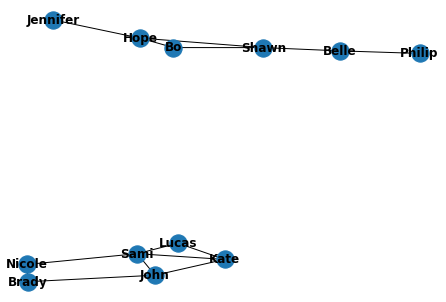

In [167]:
nx.draw(smaller_actor_network, with_labels=True, font_weight='bold')

This is a lot more interesting: while the sets of characters overlap, there is still two distinct communities if you look at characters who regularly talk to each other!

Let us see what our centrality measures look like, as well as communities.

In [168]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(smaller_actor_network))

In [169]:
c

[frozenset({'Belle', 'Bo', 'Hope', 'Jennifer', 'Philip', 'Shawn'}),
 frozenset({'Brady', 'John', 'Kate', 'Lucas', 'Nicole', 'Sami'})]

In [170]:
dcentralities = nx.degree_centrality(smaller_actor_network)

In [171]:
dcentralities['John'], dcentralities['Philip']

(0.2727272727272727, 0.09090909090909091)

Our two different communities show up as detected by the networkx algorithm, and when we look at centralities, we can see that John is a lot more central than Philip.

Let us go back to our original graph, and see if the weight or number of similar appearences matches the text... how do we do this? Well, we already have the graph, and we also have information of who spoke to who. So we have our framework!

This means we can explore ideas contained in two of the papers you will be reading: . “No country for old members: User lifecycle and linguistic change in online communities.”, and  “Fitting In or Standing Out? The Tradeoffs of Structural and Cultural Embeddedness”, both of which you can access on Canvas. 

Let us use a simplified version of the papers, and check if a higher number of conversations might lead to a higher similarity between the word distributions for two characters. We can use the same divergences we used in the last notebook. Do you think it will match with the number of times each character was associated with each other?

In [172]:
import nltk

In [173]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [174]:
corpora = []
for character in actor_network.nodes():
    character_words = []
    for sentence in actor_network.nodes[character]['words']:
        for word in sentence:
            character_words.append(word)
    corpora.append(lucem_illud_2020.normalizeTokens(character_words))

In [175]:
L = []

In [176]:
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)

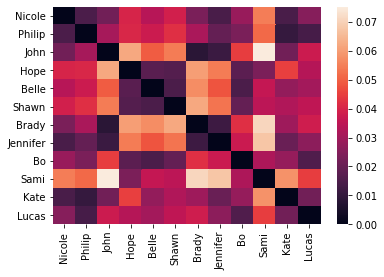

In [177]:
fig = plt.figure()
div = pandas.DataFrame(M, columns = list(actor_network.nodes()), index = list(actor_network.nodes()))
ax = sns.heatmap(div)
plt.show()

In [178]:
# np.corrcoef(M_, M)[0]

With our two heatplots, we can attempt to do some rudimentary analysis. We can see from our previous plot that Shawn and Belle talk to each other a lot, so do Hope and Bo, and Nicole and Brady, and Lucas and Sami. Do they also talk *like* each other?

Kind of, actually: all four of these pairs have a lower distance between them. Now I don't know anything about this particular soap... are these four pairs related? Are they in a relationship, either married or dating, or are they just really good friends?

This lays out the frameworks which you can now use to explore your own networks. 

# Interactional influence 互動影響

In a recent paper by Fangjian Guo, Charles Blundell, Hanna Wallach, and Katherine Heller entitled ["The Bayesian Echo Chamber: Modeling Social Influence via Linguistic Accommodation"](https://arxiv.org/pdf/1411.2674.pdf), the authors develop a method to estimate the influence of one speaker on another in order to estimate a kind of interpersonal influence network. Here we walk through this method, which relies on a kind of point process called a Hawkes process that estimate the influence of one point on another. Specifically, what they estimate is the degree to which one actor to an interpersonal interaction engaged in "accomodation" behaviors relative to the other, generating a directed edge from the one to the other.  
  
在最近的Fangjian Guo，Charles Blundell，Hanna Wallach和Katherine Heller題為[“貝葉斯呼應室：通過語言住宿建模社會影響”的撰寫版項](https://arxiv.org/pdf/1411.2674.pdf)，作者開發了一種方法來估計一個揚聲器對另一個揚聲器的影響，以估計一種人際影響網絡。在這裡，我們通過這種方法，依賴於一種稱為鷹過程的點過程，估計一個點對另一個點的影響。具體而言，它們估計的是一個actor相對於另一個的人際相互作用者與另一個行為接合的程度，從一個到另一個產生指向邊緣。

### First let's look at the output of their analysis:    
### 首先讓我們來看看他們的分析輸出：

In [125]:
example_name = '12-angry-men'   #example datasets: "12-angry-men" or "USpresident"

format，塞入字串的變數  
[Python format 格式化函数](https://www.runoob.com/python/att-string-format.html)

In [126]:
result_path = '../data/Bayesian-echo/results/{}/'.format(example_name)
if not os.path.isdir(result_path):
    raise ValueError('Invalid example selected, only "12-angry-men" or "USpresident" are avaliable')

In [127]:
df_meta_info = pandas.read_table(result_path + 'meta-info.txt',header=None)
df_log_prob = pandas.read_csv(result_path + "SAMPLE-log_prior_and_log_likelihood.txt",delim_whitespace=True) #log_prob samples
df_influence = pandas.read_csv(result_path + 'SAMPLE-influence.txt',delim_whitespace=True) # influence samples
df_participants = panda.read_csv(results_path + 'cast.txt', delim_whitespace=True)
person_id = pandas.Series(df_participants['agent.num'].values-1,index=df_participants['agent.name']).to_dict()
print()
print ('Person : ID')
person_id


Person : ID


{'Juror 8': 0,
 'Juror 3': 1,
 'Juror 10': 2,
 'Foreman': 3,
 'Juror 7': 4,
 'Juror 4': 5,
 'Juror 11': 6,
 'Juror 12': 7,
 'Juror 6': 8,
 'Juror 2': 9,
 'Juror 9': 10,
 'Juror 5': 11}

scipy.stats.gaussian_kde 高斯核心/高斯函數  
[高斯函數](https://zh.wikipedia.org/zh-tw/%E9%AB%98%E6%96%AF%E5%87%BD%E6%95%B0)  
  
linspace 序列生成器， numpy.linspace()函数用于在线性空间中以均匀步长生成数字序列。

In [128]:
def getDensity(df):
    data = df#_log_prob['log.prior']
    density = scipy.stats.gaussian_kde(data)
    width = np.max(data) - np.min(data)
    xs = np.linspace(np.min(data)-width/5, np.max(data)+width/5,600)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    return xs, density(xs)

### Plot MCMC (Markov Monte Carlo) trace and the density of log-likelihoods  
### Plot MCMC（Markov Monte Carlo）跟踪和日誌似然密度

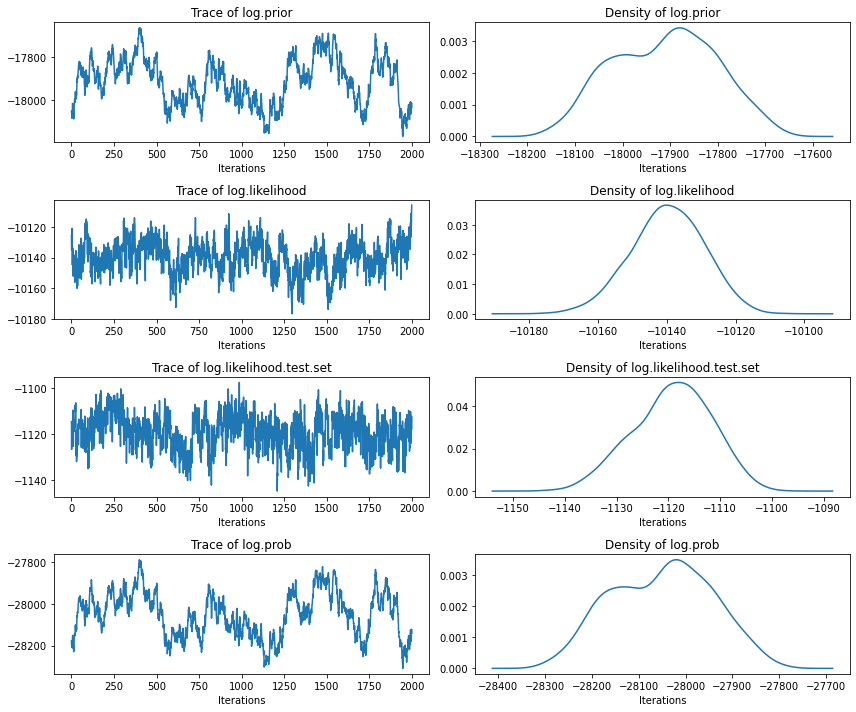

In [129]:
fig = plt.figure(figsize=[12,10])

plt.subplot(4,2,1)
plt.plot(df_log_prob['log.prior'])
plt.xlabel('Iterations')
plt.title('Trace of log.prior')

plt.subplot(4,2,2)
x,y = getDensity(df_log_prob['log.prior'])
plt.plot(x,y)
plt.xlabel('Iterations')
plt.title('Density of log.prior')

plt.subplot(4,2,3)
plt.plot(df_log_prob['log.likelihood'])
plt.title('Trace of log.likelihood')
plt.xlabel('Iterations')
plt.tight_layout()

plt.subplot(4,2,4)
x,y = getDensity(df_log_prob['log.likelihood'])
plt.plot(x,y)
plt.xlabel('Iterations')
plt.title('Density of log.likelihood')

plt.subplot(4,2,5)
plt.plot(df_log_prob['log.likelihood.test.set'])
plt.title('Trace of log.likelihood.test.set')
plt.xlabel('Iterations')
plt.tight_layout()

plt.subplot(4,2,6)
x,y = getDensity(df_log_prob['log.likelihood.test.set'])
plt.plot(x,y)
plt.xlabel('Iterations')
plt.title('Density of log.likelihood.test.set')

plt.subplot(4,2,7)
plt.plot(df_log_prob['log.prior']+df_log_prob['log.likelihood'])
plt.title('Trace of log.prob')
plt.xlabel('Iterations')

plt.subplot(4,2,8)
x,y = getDensity(df_log_prob['log.prior']+df_log_prob['log.likelihood'])
plt.plot(x,y)
plt.xlabel('Iterations')
plt.title('Density of log.prob')

plt.tight_layout()

plt.show()

### Plot the influence matrix between participants  
### 繪製參與者之間的影響矩陣

In [130]:
A = int(np.sqrt(len(df_influence.columns))) #number of participants
id_person = {}
for p in person_id:
    id_person[person_id[p]]=p

In [131]:
def getmatrix(stacked,A):
    influence_matrix = [[0 for i in range(A)] for j in range(A)]
    for row in stacked.iteritems():
        from_ = int(row[0].split('.')[1])-1
        to_ = int(row[0].split('.')[2])-1
        value = float(row[1])
        influence_matrix[from_][to_]=value
    df_ = pandas.DataFrame(influence_matrix) 
    
    df_ =df_.rename(index = id_person)
    df_ =df_.rename(columns = id_person)
    return df_

In [132]:
stacked = df_influence.mean(axis=0)
df_mean = getmatrix(stacked,A)

stacked = df_influence.std(axis=0)
df_std = getmatrix(stacked,A)

In [133]:
df_mean

Juror 8   Juror 3  Juror 10   Foreman   Juror 7   Juror 4  \
Juror 8   0.000000  3.757957  8.089079  0.930180  5.167497  0.794645   
Juror 3   8.529312  0.000000  6.673916  4.150076  2.534751  4.902852   
Juror 10  8.413188  7.427932  0.000000  4.540236  3.216307  1.030049   
Foreman   1.137060  0.612615  1.945196  0.000000  1.521390  0.834870   
Juror 7   2.603853  5.901169  0.648844  1.969868  0.000000  1.110101   
Juror 4   5.791320  0.200669  0.266484  0.582956  0.094200  0.000000   
Juror 11  0.378515  0.544628  0.779340  0.454645  0.290575  0.447512   
Juror 12  5.961338  0.695831  0.519459  1.253033  0.247939  0.162463   
Juror 6   4.526244  0.923784  0.503503  1.049825  1.288920  0.451562   
Juror 2   0.583732  2.303417  0.529583  1.722894  2.005939  0.299311   
Juror 9   1.216641  1.281288  0.967587  1.675483  1.657341  1.681338   
Juror 5   0.552951  1.001575  0.696393  1.180245  1.180355  0.497265   

          Juror 11  Juror 12   Juror 6   Juror 2   Juror 9   Juror 5  
Juror 8   0.845335  1.336329  6.106684  0.916765  6.385205  7.300776  
Juror 3   1.092571  0.509942  3.825015  3.861767  0.266426  1.561626  
Juror 10  1.004598  0.529232  2.426582  0.407460  1.233599  0.885871  
Foreman   1.338554  3.230634  1.013511  3.534036  1.311436  4.115411  
Juror 7   0.279870  0.608548  1.047693  2.910670  1.619475  1.570038  
Juror 4   3.347982  0.316963  0.300770  2.112033  0.370973  0.673364  
Juror 11  0.000000  0.614536  0.821143  0.951222  0.476986  0.844157  
Juror 12  0.388620  0.000000  2.500976  2.375977  0.481394  0.834032  
Juror 6   0.375776  0.904313  0.000000  2.861587  0.905421  0.310822  
Juror 2   0.652302  1.623813  0.841376  0.000000  1.691612  1.756225  
Juror 9   0.623032  1.925996  1.907992  0.539666  0.000000  1.138934  
Juror 5   0.786181  0.588822  0.724613  0.912616  1.224854  0.000000

MEAN of influence matrix (row=from, col=to)


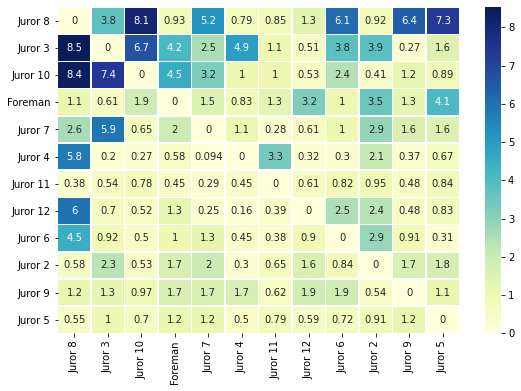

In [134]:
f, ax = plt.subplots(figsize=(9, 6))
seaborn.heatmap(df_mean, annot=True,  linewidths=.5, ax=ax,cmap="YlGnBu")
print('MEAN of influence matrix (row=from, col=to)')
plt.show()

SD of influence matrix (row=from, col=to)


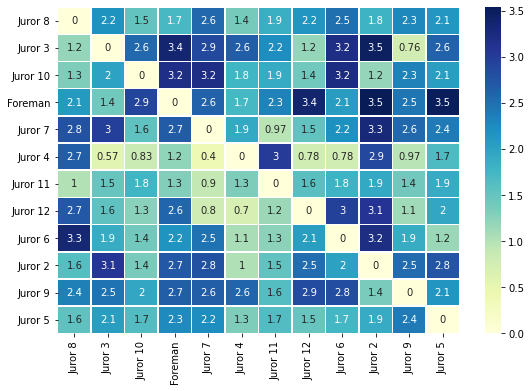

In [135]:
f, ax = plt.subplots(figsize=(9, 6))
seaborn.heatmap(df_std, annot=True,  linewidths=.5, ax=ax,cmap="YlGnBu")
print('SD of influence matrix (row=from, col=to)')
plt.show()

### Barplot of total influences sent/received  
每份影響/收到的總影響的Barplot

In [136]:
sender_std = {} #sd of total influence sent
reciever_std = {} #sd of total influence recieved
for i in range(A):
    reciever_std[id_person[i]] = df_influence[df_influence.columns[i::A]].sum(axis=1).std()
    sender_std[id_person[i]] = df_influence[df_influence.columns[i*A:(i+1)*A:]].sum(axis=1).std()

sent = df_mean.sum(axis=1) #mean of total influence sent
recieved =df_mean.sum(axis=0) #mean of total influence recieved

Total influence:

		Total linguistic influence sent/received 


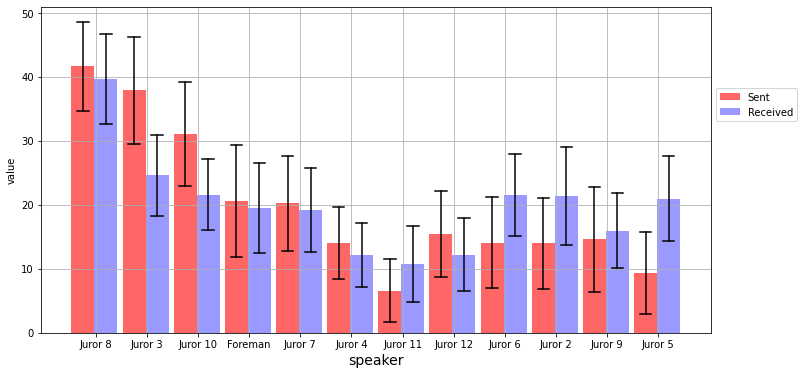

In [137]:
print ("\t\tTotal linguistic influence sent/received ")
ax.fig = plt.figure(figsize=[np.min([A,20]),6])

plt.grid()
wd=0.45
ii=0
for p in sender_std:
    plt.bar(person_id[p],sent.loc[p],width=wd,color='red',alpha=0.6,label = "Sent" if ii == 0 else "")
    plt.plot([person_id[p]-wd/4,person_id[p]+wd/4],[sent.loc[p]+sender_std[p],sent.loc[p]+sender_std[p]],color='k')
    plt.plot([person_id[p]-wd/4,person_id[p]+wd/4],[sent.loc[p]-sender_std[p],sent.loc[p]-sender_std[p]],color='k')
    plt.plot([person_id[p],person_id[p]],[sent.loc[p]-sender_std[p],sent.loc[p]+sender_std[p]],color='k')
    ii+=1
ii=0
for p in reciever_std:
    plt.bar(person_id[p]+wd,recieved.loc[p],width=wd,color='blue',alpha=0.4,label = "Received" if ii == 0 else "")
    plt.plot([person_id[p]+wd-wd/4,person_id[p]+wd+wd/4],[recieved.loc[p]+reciever_std[p],recieved.loc[p]+reciever_std[p]],color='k')
    plt.plot([person_id[p]+wd-wd/4,person_id[p]+wd+wd/4],[recieved.loc[p]-reciever_std[p],recieved.loc[p]-reciever_std[p]],color='k')
    plt.plot([person_id[p]+wd,person_id[p]+wd],[recieved.loc[p]-reciever_std[p],recieved.loc[p]+reciever_std[p]],color='k')
    ii+=1
plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.xticks([i+0.25 for i in range(A)],list(zip(*sorted(id_person.items())))[1])
plt.ylabel('value')
plt.xlabel('speaker',fontsize=14)
plt.show()

## Visualize Influence Network!

You can visualize any of the influence matrices above:

Using networkx:

In [138]:
def drawNetwork(df,title):
    fig = plt.figure(figsize=[8,8])
    G = nx.DiGraph()
    for from_ in df.index:
        for to_ in df.columns:
            G.add_edge(from_,to_,weight = df.loc[from_][to_])
            
    pos = nx.spring_layout(G,k=0.55,iterations=20)
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    weights = np.array(weights)
    #weights = weights*weights
    weights = 6*weights/np.max(weights)
    print(title)
    
    edge_colors=20*(weights/np.max(weights))
    edge_colors = edge_colors.astype(int)
#     nx.draw_networkx_nodes(G,pos,node_size=1200,alpha=0.7,node_color='#99cef7')
#     nx.draw_networkx_edges(G,pos,edge_color=edge_colors)
#     nx.draw_networkx_labels(G,pos,font_weight='bold')
    nx.draw(G,pos,with_labels=True, font_weight='bold',width=weights,\
            edge_color=255-edge_colors,node_color='#99cef7',node_size=1200,\
            alpha=0.75,arrows=True,arrowsize=20)
    return edge_colors

In [139]:
# get quantile influence matrices for 25%, 50%, 75% quantile
stacked = df_influence.quantile(0.25)
df_q25 = getmatrix(stacked,A)

stacked = df_influence.quantile(0.5)
df_q50 = getmatrix(stacked,A)

stacked = df_influence.quantile(0.75)
df_q75 = getmatrix(stacked,A)

Mean Influence Network


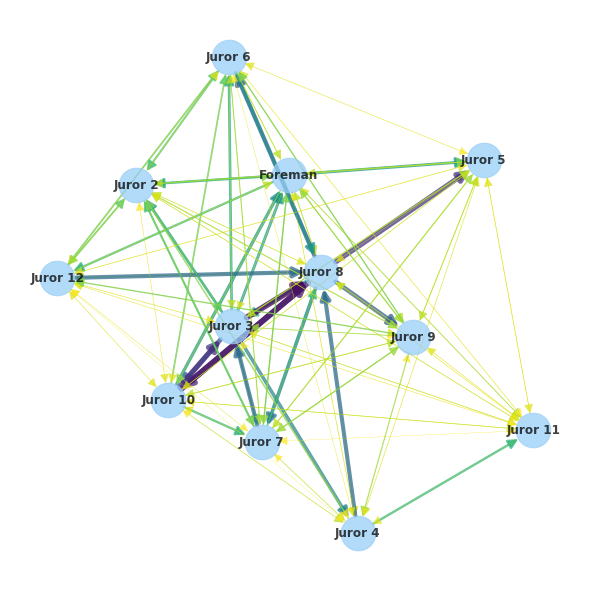

In [140]:
G_mean = drawNetwork(df_mean,'Mean Influence Network')

25 Quantile Influence Network


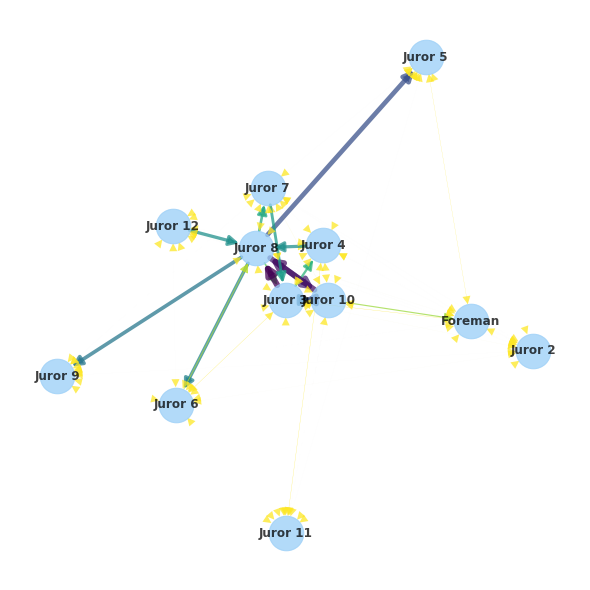

In [141]:
G_q25 = drawNetwork(df_q25,'25 Quantile Influence Network')

75 Quantile Influence Network


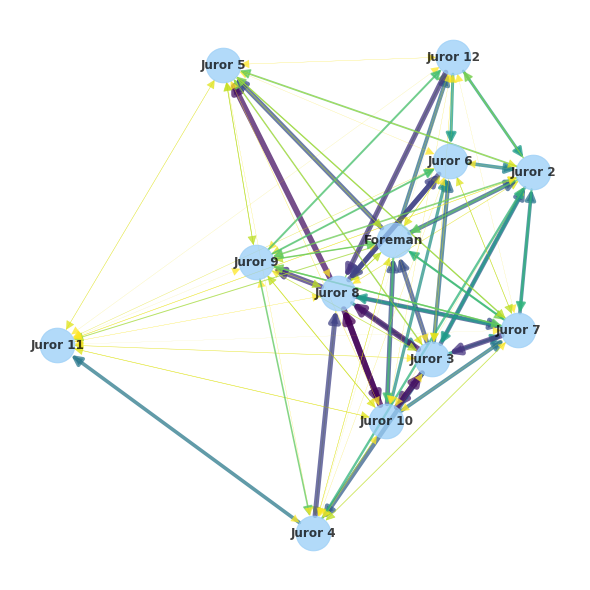

In [142]:
G_q75 = drawNetwork(df_q75,'75 Quantile Influence Network')

In [143]:
import lucem_illud_2020
import pandas
def fakeEnglish(length):
    listd=['a','b','c','d','e','f','g','s','h','i','j','k','l']
    return ''.join(np.random.choice(listd,length))

處理數據時經常需要從數組中隨機抽取元素，這時候就需要用到np.random.choice()

Your own dataset should contains 4 columns (with the same column names) as the artificial one below:  
您自己的數據集應包含4列（具有相同的列名），如下面的人造：

- name: name of the participant 參與者的名稱
- tokens: a list of tokens in one utterance 一個話語中的令牌列表
- start: starting time of utterance 話語開始時(unit doesn't matter, can be 'seconds','minutes','hours'...)
- end: ending time of utterance 話語的結束時間(same unit as start)

There is no need to sort data for the moment.  
目前無需對數據進行排序。

Below, we generate a fake collection of data from "Obama", "Trump", "Clinton"...and other recent presidents. You can either create your own simulation OR (better), add real interactional data from a online chat forum, comment chain, or transcribed from a conversation.  
下面，我們從“奧巴馬”，“特朗普”，“克林頓”和其他最近總統的虛假收集。您可以創建自己的模擬或（更好），從在線聊天論壇，註釋鏈中添加真實的互動數據，或者從對話轉錄。

 range(20)：起始值預設從0開始，所以會產生0到19的整數序列。

In [144]:
script= []
language = 'eng' #parameter, no need to tune if using English, accept:{'eng','chinese'}
role = 'Adult' #parameter, no need to tune 

for i in range(290):
    dt = []
    dt.append(np.random.choice(['Obama','Trump','Clinton','Bush','Reagan','Carter','Ford','Nixon','Kennedy','Roosevelt']))
    faketokens = [fakeEnglish(length = 4) for j in range(30)]
    dt.append(faketokens) #fake utterance
    dt.append(i*2+np.random.random()) # start time
    dt.append(i*2+1+np.random.random()) # end time
    script.append(dt)

df_transcript = pandas.DataFrame(script,columns=['name','tokens','start','end']) #"start", "end" are timestamps of utterances, units don't matter
df_transcript[:2]

name                                             tokens     start  \
0      Nixon  [ebib, ajge, eekc, bcjj, ccgh, jijj, llbd, ksf...  0.529379   
1  Roosevelt  [ecci, bihj, bggk, afck, gdjd, kcid, sddi, jbg...  2.580495   

        end  
0  1.151518  
1  3.427063

Transform data into TalkbankXML format:

In [145]:
output_fname = 'USpresident.xml'  #should be .xml
language = 'eng' 
#language = 'chinese'
lucem_illud_2020.make_TalkbankXML(df_transcript, output_fname, language = language )

New File saved to .\data\USpresident\USpresident.xml


0

Run Bayesian Echo Chamber to get estimation.

- It may take a couple of hours. ( About 4-5 hours if Vocab_size=600 and sampling_time =2000)
- Larger "Vocab_size" (see below) will cost more time
- Larger "sampling_time" will also consume more time

In [146]:
Vocab_size = 90 # up to Vocab_size most frequent words will be considered, it should be smaller than the total vocab
sampling_time = 1500  #The times of Gibbs sampling sweeps  (500 burn-in not included)
lucem_illud_2020.bec_run(output_fname, Vocab_size, language, sampling_time)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that perform a similar social similarity or influence analysis on a dataset relevant to your final project. Create relationships between actors in a network based on your dataset (e.g., person to person or document to document), and perform analyses that interrogate the structure of their interactions, similarity, and/or influence on one another. (For example, if relevant to your final project, you could explore different soap operas, counting how many times a character may have used the word love in conversation with another character, and identify if characters in love speak like each other. Or do opposites attract?) What does that analysis and its output reveal about the relative influence of each actor on others? What does it reveal about the social game being played?

<span style="color:red">Stretch 1:
Render the social network with weights (e.g., based on the number of scenes in which actors appear together), then calculate the most central actors in the show.Realtime output can be viewed in shell.

<span style="color:red">Stretch 2:
Implement more complex measures of similarity based on the papers you have read.

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">構建下面的細胞，在與最終項目相關的數據集上執行類似的社交相似性或影響分析。基於您的數據集（例如，人員或文檔）基於網絡中的行為者之間的關係，並執行分析，以詢問其交互，相似性和/或相互影響的結構。 （例如，如果與您的最終項目相關，您可以探索不同的SOAP操作，計數角色可能使用與其他角色對話中的Word Love的次單詞，並識別愛中的字符彼此說話。還是對立吸引？）這種分析及其產出揭示了每個演員對他人的相對影響？關於正在播放的社交遊戲揭示了什麼？

<span style="color:red">Stretch 1:
將社交網絡與權重渲染（例如，根據演員出現在一起的場景數），然後計算show.realtime輸出中的最央行播放器可以在shell中查看。

<span style="color:red">Stretch 2:
根據您已閱讀的論文實施更複雜的相似度措施。

## Conversational Analysis using ConvoKit 使用競爭性的會話分析

The accompanying notebook [convokit](https://github.com/Computational-Content-Analysis-2020/Content-Analysis-2020/blob/master/week-4/convokit.ipynb) demonstrates the capacities of CornellNLP's package convokit, which provides multiple ways to analyse networks of conversations. We have already had the opportunity to read three papers exemplifying a few these methods (e.g., 'Echoes of Power', 'Anyone can become a Troll', 'No Country for Old Members').
  
The accompanying notebook [convokit](https://github.com/Computational-Content-Analysis-2020/Content-Analysis-2020/blob/master/week-4/convokit.ipynb) 展示Cornellnlp包官方的能力，它提供了多種方式來分析對話網絡。我們已經有機會閱讀有三篇論文舉例說明了一些這些方法 (e.g., 'Echoes of Power', 'Anyone can become a Troll', 'No Country for Old Members').

There are 6 different approaches illustrated:

1. Measures of linguistic coordination
2. Politeness strategy
3. Prompt type
4. Hypergraph conversation representation
5. Linguistic diversity in conversations
6. Forecasting of conversation outcomes
  
  
1. 語言協調措施  
2. 禮貌策略  
3. 提示類型  
4. 超圖談話表示  
5. 談話中的語言多樣性  
6. 談話結果預測

The examples illustrate these methods using the built in datasets which ConvoKit offers.   
This [Jupyter notebook](https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/converting_movie_corpus.ipynb) demonstrates how to convert your own corpora so that you can easily use the metrics provided in convokit.   
  
這些示例說明了使用內置的DataSets的這些方法，該方法官方數據集。  
This [Jupyter notebook](https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/converting_movie_corpus.ipynb) 演示如何轉換您自己的Corpora，以便您可以輕鬆地使用Compokit中提供的指標。

## <span style="color:red">*Exercise 5*</span>

<span style="color:red"> Implement one (or more) of the metrics, models or predictions from ConvoKit on a corpus relevant to your final project; what does it reveal about the social game underlying your text?"  
    
<span style="color:red"> 在與最終項目相關的語料庫上實現一個（或多個）的指標，模型或預測;它揭示了文本底層的社交遊戲什麼？“
